## 1. Setting & Data Import

### 데이터 분석 준비

In [166]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns

In [167]:
plt.style.use("ggplot")

In [168]:
import pandas as pd
import numpy as np

In [169]:
import random
np.random.seed(1234)
random.seed(1234)

In [170]:
import warnings
warnings.filterwarnings("ignore")

#### 데이터 불러오기

In [171]:
train_df = pd.read_csv("./data/train.csv")
test_df = pd.read_csv("./data/test.csv")
submission = pd.read_csv("./data/sample_submission.csv")

In [172]:
train_df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


## 2. Make baseline

### 벤치마크용 베이스라인 작성하기

#### 학습 데이터의 변수 유형 확인하기

In [173]:
train_df.dtypes

Id                 int64
MSSubClass         int64
MSZoning          object
LotFrontage      float64
LotArea            int64
                  ...   
MoSold             int64
YrSold             int64
SaleType          object
SaleCondition     object
SalePrice          int64
Length: 81, dtype: object

In [174]:
train_df["MSZoning"].value_counts()

RL         1151
RM          218
FV           65
RH           16
C (all)      10
Name: MSZoning, dtype: int64

#### 학습 데이터와 테스트 데이터를 합해서 전처리하기

In [175]:
all_df = pd.concat([train_df, test_df], sort=False).reset_index(drop=True)

In [176]:
all_df

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500.0
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500.0
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500.0
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000.0
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2914,2915,160,RM,21.0,1936,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,6,2006,WD,Normal,NaN
2915,2916,160,RM,21.0,1894,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,4,2006,WD,Abnorml,NaN
2916,2917,20,RL,160.0,20000,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2006,WD,Abnorml,NaN
2917,2918,85,RL,62.0,10441,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,MnPrv,Shed,700,7,2006,WD,Normal,NaN


#### 목적 변수인 SalePrice 값 확인하기

In [177]:
all_df["SalePrice"]

0       208500.0
1       181500.0
2       223500.0
3       140000.0
4       250000.0
          ...   
2914         NaN
2915         NaN
2916         NaN
2917         NaN
2918         NaN
Name: SalePrice, Length: 2919, dtype: float64

#### 카테고리 변수를 수치로 변환하기

In [178]:
from sklearn.preprocessing import LabelEncoder

In [179]:
categories = all_df.columns[all_df.dtypes == "object"]
print(categories)

Index(['MSZoning', 'Street', 'Alley', 'LotShape', 'LandContour', 'Utilities',
       'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2',
       'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st',
       'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation',
       'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2',
       'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual',
       'Functional', 'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageQual',
       'GarageCond', 'PavedDrive', 'PoolQC', 'Fence', 'MiscFeature',
       'SaleType', 'SaleCondition'],
      dtype='object')


In [180]:
all_df["Alley"].value_counts()

Grvl    120
Pave     78
Name: Alley, dtype: int64

In [181]:
for cat in categories:
    le = LabelEncoder()
    print(cat)
    
    all_df[cat].fillna("missing", inplace=True)    
    le = le.fit(all_df[cat])
    all_df[cat] = le.transform(all_df[cat])
    all_df[cat] = all_df[cat].astype("category")

MSZoning
Street
Alley
LotShape
LandContour
Utilities
LotConfig
LandSlope
Neighborhood
Condition1
Condition2
BldgType
HouseStyle
RoofStyle
RoofMatl
Exterior1st
Exterior2nd
MasVnrType
ExterQual
ExterCond
Foundation
BsmtQual
BsmtCond
BsmtExposure
BsmtFinType1
BsmtFinType2
Heating
HeatingQC
CentralAir
Electrical
KitchenQual
Functional
FireplaceQu
GarageType
GarageFinish
GarageQual
GarageCond
PavedDrive
PoolQC
Fence
MiscFeature
SaleType
SaleCondition


In [182]:
all_df

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,3,65.0,8450,1,2,3,3,0,...,0,3,4,4,0,2,2008,8,4,208500.0
1,2,20,3,80.0,9600,1,2,3,3,0,...,0,3,4,4,0,5,2007,8,4,181500.0
2,3,60,3,68.0,11250,1,2,0,3,0,...,0,3,4,4,0,9,2008,8,4,223500.0
3,4,70,3,60.0,9550,1,2,0,3,0,...,0,3,4,4,0,2,2006,8,0,140000.0
4,5,60,3,84.0,14260,1,2,0,3,0,...,0,3,4,4,0,12,2008,8,4,250000.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2914,2915,160,4,21.0,1936,1,2,3,3,0,...,0,3,4,4,0,6,2006,8,4,NaN
2915,2916,160,4,21.0,1894,1,2,3,3,0,...,0,3,4,4,0,4,2006,8,0,NaN
2916,2917,20,3,160.0,20000,1,2,3,3,0,...,0,3,4,4,0,9,2006,8,0,NaN
2917,2918,85,3,62.0,10441,1,2,3,3,0,...,0,3,2,2,700,7,2006,8,4,NaN


#### 데이터를 train_df와 test_df로 되돌리기

In [183]:
train_df_le = all_df[~all_df["SalePrice"].isnull()]
test_df_le = all_df[all_df["SalePrice"].isnull()]

#### LightGBM으로 데이터 읽기

In [184]:
import lightgbm as lgb

In [185]:
from sklearn.model_selection import KFold
folds = 3
kf = KFold(n_splits=folds)

In [186]:
lgbm_params = {
    "objective":"regression",
    "random_seed":1234
}

In [187]:
train_X = train_df_le.drop(["SalePrice", "Id"], axis=1)
train_Y = train_df_le["SalePrice"]

In [188]:
from sklearn.metrics import mean_squared_error
from platform import python_version

print(python_version())

3.8.11


In [189]:
models = []
rmses = []
oof = np.zeros(len(train_X))

for train_index, val_index in kf.split(train_X):
    X_train = train_X.iloc[train_index]
    X_valid = train_X.iloc[val_index]
    y_train = train_Y.iloc[train_index]
    y_valid = train_Y.iloc[val_index]
    print(X_train)
    lgb_train = lgb.Dataset(X_train, y_train)
    lgb_eval = lgb.Dataset(X_valid, y_valid, reference=lgb_train)    
    
    model_lgb = lgb.train(lgbm_params, 
                          lgb_train, 
                          valid_sets=lgb_eval, 
                          num_boost_round=100,
                          early_stopping_rounds=20,
                          verbose_eval=10,
                         )    
    
    y_pred = model_lgb.predict(X_valid, num_iteration=model_lgb.best_iteration)
    tmp_rmse = np.sqrt(mean_squared_error(np.log(y_valid), np.log(y_pred)))
    print(tmp_rmse)    
              
    models.append(model_lgb)    
    rmses.append(tmp_rmse)
    oof[val_index] = y_pred 

      MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
487           20        3         70.0    12243      1     2        0   
488          190        3         60.0    10800      1     2        3   
489          180        4         21.0     1526      1     2        3   
490          160        4          NaN     2665      1     2        3   
491           50        3         79.0     9490      1     2        3   
...          ...      ...          ...      ...    ...   ...      ...   
1455          60        3         62.0     7917      1     2        3   
1456          20        3         85.0    13175      1     2        3   
1457          70        3         66.0     9042      1     2        3   
1458          20        3         68.0     9717      1     2        3   
1459          20        3         75.0     9937      1     2        3   

     LandContour Utilities LotConfig  ... ScreenPorch PoolArea PoolQC Fence  \
487            3         0         4  ...   

Training until validation scores don't improve for 20 rounds
[10]	valid_0's l2: 1.78839e+09
[20]	valid_0's l2: 1.03494e+09
[30]	valid_0's l2: 8.77181e+08
[40]	valid_0's l2: 8.59747e+08
[50]	valid_0's l2: 8.45919e+08
[60]	valid_0's l2: 8.35019e+08
[70]	valid_0's l2: 8.27851e+08
[80]	valid_0's l2: 8.37089e+08
Early stopping, best iteration is:
[69]	valid_0's l2: 8.26998e+08
0.13226664456356535


In [190]:
sum(rmses)/len(rmses)

0.13697846250952908

In [191]:
actual_pred_df = pd.DataFrame({
    "actual" : train_Y,
    "pred" : oof })

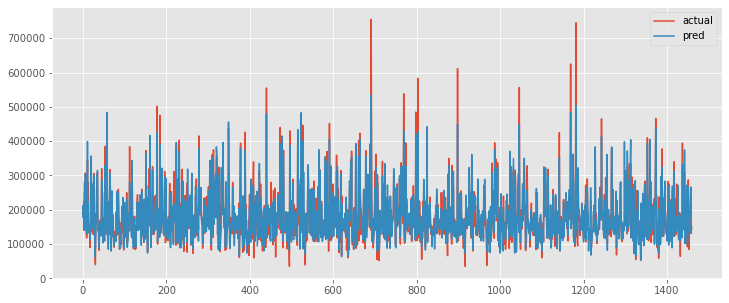

In [192]:
actual_pred_df.plot(figsize=(12,5))

### 각 변수의 중요도 확인하기

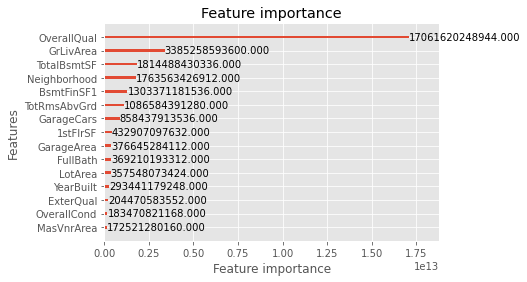

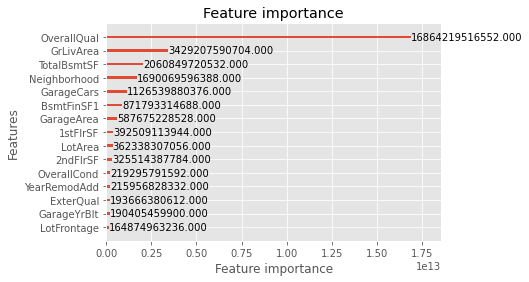

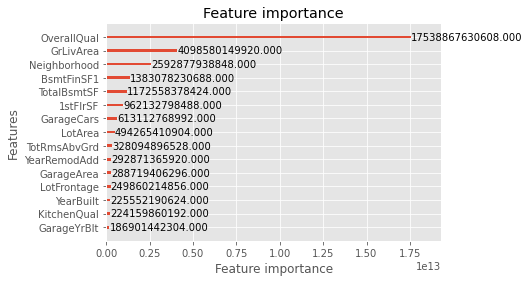

In [193]:
for model in models:
    lgb.plot_importance(model,importance_type="gain", max_num_features=15)

## 3. Preprocessing(object variable)

### 목적 변수의 전처리: 목적 변수의 분포 확인하기

#### SalePrice 데이터의 분포 확인하기

In [194]:
train_df["SalePrice"].describe()

count      1460.000000
mean     180921.195890
std       79442.502883
min       34900.000000
25%      129975.000000
50%      163000.000000
75%      214000.000000
max      755000.000000
Name: SalePrice, dtype: float64

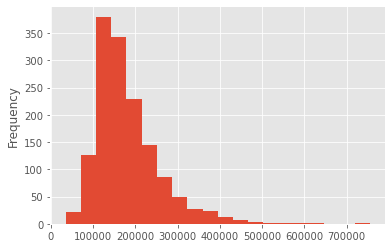

In [195]:
train_df["SalePrice"].plot.hist(bins=20)

#### 목적 변수를 로그화하기

In [196]:
np.log(train_df['SalePrice'])

0       12.247694
1       12.109011
2       12.317167
3       11.849398
4       12.429216
          ...    
1455    12.072541
1456    12.254863
1457    12.493130
1458    11.864462
1459    11.901583
Name: SalePrice, Length: 1460, dtype: float64

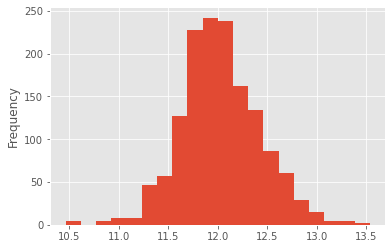

In [197]:
np.log(train_df['SalePrice']).plot.hist(bins=20)

#### 목적 변수를 로그화하여 예측 정확도 향상시키기

In [198]:
pd.options.mode.chained_assignment = None
train_df_le["SalePrice_log"] = np.log(train_df_le["SalePrice"])

In [199]:
train_X = train_df_le.drop(["SalePrice","SalePrice_log","Id"], axis=1)
train_Y = train_df_le["SalePrice_log"]

In [200]:
import warnings
warnings.filterwarnings("ignore")

models = []
rmses = []
oof = np.zeros(len(train_X))

for train_index, val_index in kf.split(train_X):
    X_train = train_X.iloc[train_index]
    X_valid = train_X.iloc[val_index]
    y_train = train_Y.iloc[train_index]
    y_valid = train_Y.iloc[val_index]
        
    lgb_train = lgb.Dataset(X_train, y_train)
    lgb_eval = lgb.Dataset(X_valid, y_valid, reference=lgb_train)    
    
    model_lgb = lgb.train(lgbm_params, 
                          lgb_train, 
                          valid_sets=lgb_eval, 
                          num_boost_round=100,
                          early_stopping_rounds=20,
                          verbose_eval=10,
                         )    
    
    y_pred = model_lgb.predict(X_valid, num_iteration=model_lgb.best_iteration)
    tmp_rmse = np.sqrt(mean_squared_error(y_valid, y_pred))
    print(tmp_rmse)    
              
    models.append(model_lgb)    
    rmses.append(tmp_rmse)
    oof[val_index] = y_pred 

Training until validation scores don't improve for 20 rounds
[10]	valid_0's l2: 0.0435757
[20]	valid_0's l2: 0.0223987
[30]	valid_0's l2: 0.0176962
[40]	valid_0's l2: 0.0164304
[50]	valid_0's l2: 0.0161943
[60]	valid_0's l2: 0.0161858
[70]	valid_0's l2: 0.0161666
[80]	valid_0's l2: 0.0161769
[90]	valid_0's l2: 0.0162121
Early stopping, best iteration is:
[73]	valid_0's l2: 0.0161129
0.12693572281592597
Training until validation scores don't improve for 20 rounds
[10]	valid_0's l2: 0.0480056
[20]	valid_0's l2: 0.0274907
[30]	valid_0's l2: 0.022779
[40]	valid_0's l2: 0.0214744
[50]	valid_0's l2: 0.0209095
[60]	valid_0's l2: 0.0205922
[70]	valid_0's l2: 0.0204381
[80]	valid_0's l2: 0.0203135
[90]	valid_0's l2: 0.020318
[100]	valid_0's l2: 0.0202246
Did not meet early stopping. Best iteration is:
[100]	valid_0's l2: 0.0202246
0.1422133338842566
Training until validation scores don't improve for 20 rounds
[10]	valid_0's l2: 0.0388654
[20]	valid_0's l2: 0.0209198
[30]	valid_0's l2: 0.0176337

In [201]:
sum(rmses)/len(rmses)

0.13284034805621694

## 4. Preproccesing(Explanatory variable)

### 설명 변수의 전처리: 결측치 확인하기

#### 각 설명 변수의 결측치 확인

In [202]:
all_df = pd.concat([train_df, test_df], sort=False).reset_index(drop=True)

In [203]:
categories = all_df.columns[all_df.dtypes == "object"]
print(categories)

Index(['MSZoning', 'Street', 'Alley', 'LotShape', 'LandContour', 'Utilities',
       'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2',
       'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st',
       'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation',
       'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2',
       'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual',
       'Functional', 'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageQual',
       'GarageCond', 'PavedDrive', 'PoolQC', 'Fence', 'MiscFeature',
       'SaleType', 'SaleCondition'],
      dtype='object')


In [204]:
all_df.isnull().sum().sort_values(ascending=False).head(40)

PoolQC          2909
MiscFeature     2814
Alley           2721
Fence           2348
SalePrice       1459
FireplaceQu     1420
LotFrontage      486
GarageQual       159
GarageYrBlt      159
GarageFinish     159
GarageCond       159
GarageType       157
BsmtExposure      82
BsmtCond          82
BsmtQual          81
BsmtFinType2      80
BsmtFinType1      79
MasVnrType        24
MasVnrArea        23
MSZoning           4
Utilities          2
Functional         2
BsmtFullBath       2
BsmtHalfBath       2
GarageArea         1
BsmtFinSF2         1
Exterior1st        1
TotalBsmtSF        1
GarageCars         1
BsmtUnfSF          1
Electrical         1
BsmtFinSF1         1
KitchenQual        1
SaleType           1
Exterior2nd        1
Street             0
RoofMatl           0
MSSubClass         0
LotArea            0
OverallCond        0
dtype: int64

#### 결측치가 많은 고급 주택 설비에 관한 변수 정리하기

In [205]:
all_df.PoolQC.value_counts()

Ex    4
Gd    4
Fa    2
Name: PoolQC, dtype: int64

In [206]:
all_df.loc[~all_df["PoolQC"].isnull(), "PoolQC"] = 1
all_df.loc[all_df["PoolQC"].isnull(), "PoolQC"] = 0

In [207]:
all_df.PoolQC.value_counts()

0    2909
1      10
Name: PoolQC, dtype: int64

In [208]:
all_df.loc[~all_df["MiscFeature"].isnull(), "MiscFeature"] = 1
all_df.loc[all_df["MiscFeature"].isnull(), "MiscFeature"] = 0

In [209]:
all_df.loc[~all_df["Alley"].isnull(), "Alley"] = 1
all_df.loc[all_df["Alley"].isnull(), "Alley"] = 0

In [210]:
HighFacility_col = ["PoolQC","MiscFeature","Alley"]
for col in HighFacility_col:
    if all_df[col].dtype == "object":
        if len(all_df[all_df[col].isnull()]) > 0:
            all_df.loc[~all_df[col].isnull(), col] = 1
            all_df.loc[all_df[col].isnull(), col] = 0

In [211]:
all_df["hasHighFacility"] = all_df["PoolQC"] + all_df["MiscFeature"] + all_df["Alley"]

In [212]:
all_df["hasHighFacility"] = all_df["hasHighFacility"].astype(int)

In [213]:
all_df["hasHighFacility"].value_counts()

0    2615
1     295
2       9
Name: hasHighFacility, dtype: int64

In [214]:
all_df = all_df.drop(["PoolQC","MiscFeature","Alley"],axis=1)

## 5. Outlier

### 이상치 제외하기

#### 각 변수의 통계량 확인하기

In [215]:
all_df.describe().T

,count,mean,std,min,25%,50%,75%,max
Id,2919.0,1460.000000,842.787043,1.0,730.5,1460.0,2189.5,2919.0
MSSubClass,2919.0,57.137718,42.517628,20.0,20.0,50.0,70.0,190.0
LotFrontage,2433.0,69.305795,23.344905,21.0,59.0,68.0,80.0,313.0
LotArea,2919.0,10168.114080,7886.996359,1300.0,7478.0,9453.0,11570.0,215245.0
OverallQual,2919.0,6.089072,1.409947,1.0,5.0,6.0,7.0,10.0
OverallCond,2919.0,5.564577,1.113131,1.0,5.0,5.0,6.0,9.0
YearBuilt,2919.0,1971.312778,30.291442,1872.0,1953.5,1973.0,2001.0,2010.0
YearRemodAdd,2919.0,1984.264474,20.894344,1950.0,1965.0,1993.0,2004.0,2010.0
MasVnrArea,2896.0,102.201312,179.334253,0.0,0.0,0.0,164.0,1600.0
BsmtFinSF1,2918.0,441.423235,455.610826,0.0,0.0,368.5,733.0,5644.0


#### 수치 데이터만 추출하기

In [216]:
train_df_num = train_df.select_dtypes(include=[np.number])

In [217]:
nonratio_features = ["Id", "MSSubClass", "OverallQual", "OverallCond", "YearBuilt", "YearRemodAdd", "MoSold", "YrSold"]

In [218]:
num_features = sorted(list(set(train_df_num) - set(nonratio_features)))

In [219]:
num_features

['1stFlrSF',
 '2ndFlrSF',
 '3SsnPorch',
 'BedroomAbvGr',
 'BsmtFinSF1',
 'BsmtFinSF2',
 'BsmtFullBath',
 'BsmtHalfBath',
 'BsmtUnfSF',
 'EnclosedPorch',
 'Fireplaces',
 'FullBath',
 'GarageArea',
 'GarageCars',
 'GarageYrBlt',
 'GrLivArea',
 'HalfBath',
 'KitchenAbvGr',
 'LotArea',
 'LotFrontage',
 'LowQualFinSF',
 'MasVnrArea',
 'MiscVal',
 'OpenPorchSF',
 'PoolArea',
 'SalePrice',
 'ScreenPorch',
 'TotRmsAbvGrd',
 'TotalBsmtSF',
 'WoodDeckSF']

In [220]:
train_df_num_rs = train_df_num[num_features]

#### 다수의 데이터가 0인 변수 확인하기

In [221]:
for col in num_features:
    if train_df_num_rs.describe()[col]["75%"] == 0:
        print(col, len(train_df_num_rs[train_df_num_rs[col] == 0]))

3SsnPorch 1436
BsmtFinSF2 1293
BsmtHalfBath 1378
EnclosedPorch 1252
LowQualFinSF 1434
MiscVal 1408
PoolArea 1453
ScreenPorch 1344


#### 특정 값만 가지는 변수 확인하기

In [222]:
for col in num_features:
    if train_df_num_rs[col].nunique() < 15:
        print(col, train_df_num_rs[col].nunique())

BedroomAbvGr 8
BsmtFullBath 4
BsmtHalfBath 3
Fireplaces 4
FullBath 4
GarageCars 5
HalfBath 3
KitchenAbvGr 4
PoolArea 8
TotRmsAbvGrd 12


#### 이상치가 있는지 확인하기

In [223]:
for col in num_features:
    tmp_df = train_df_num_rs[(train_df_num_rs[col] > train_df_num_rs[col].mean() + train_df_num_rs[col].std()*3) | \
    (train_df_num_rs[col] < train_df_num_rs[col].mean() - train_df_num_rs[col].std()*3)]
    print(col, len(tmp_df))

1stFlrSF 12
2ndFlrSF 4
3SsnPorch 23
BedroomAbvGr 14
BsmtFinSF1 6
BsmtFinSF2 50
BsmtFullBath 16
BsmtHalfBath 82
BsmtUnfSF 11
EnclosedPorch 51
Fireplaces 5
FullBath 0
GarageArea 7
GarageCars 0
GarageYrBlt 1
GrLivArea 16
HalfBath 12
KitchenAbvGr 68
LotArea 13
LotFrontage 12
LowQualFinSF 20
MasVnrArea 32
MiscVal 8
OpenPorchSF 27
PoolArea 7
SalePrice 22
ScreenPorch 55
TotRmsAbvGrd 12
TotalBsmtSF 10
WoodDeckSF 22


#### 이상치를 포함하는 변수의 분포를 시각화하기

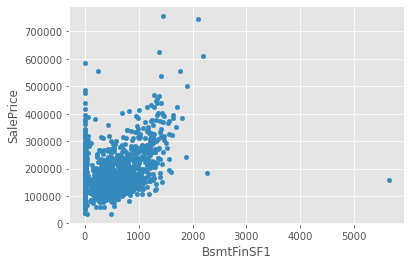

In [224]:
all_df.plot.scatter(x="BsmtFinSF1", y="SalePrice")

In [225]:
all_df[all_df["BsmtFinSF1"] > 5000]

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,...,ScreenPorch,PoolArea,Fence,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice,hasHighFacility
1298,1299,60,RL,313.0,63887,Pave,IR3,Bnk,AllPub,Corner,...,0,480,NaN,0,1,2008,New,Partial,160000.0,1


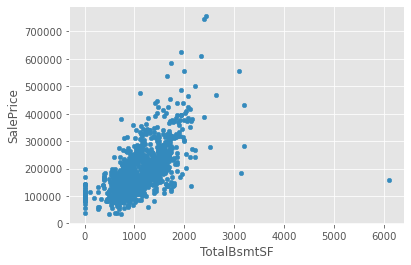

In [226]:
all_df.plot.scatter(x="TotalBsmtSF", y="SalePrice")

In [227]:
all_df[all_df["TotalBsmtSF"] > 6000]

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,...,ScreenPorch,PoolArea,Fence,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice,hasHighFacility
1298,1299,60,RL,313.0,63887,Pave,IR3,Bnk,AllPub,Corner,...,0,480,NaN,0,1,2008,New,Partial,160000.0,1


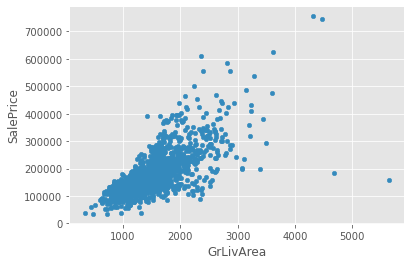

In [228]:
all_df.plot.scatter(x="GrLivArea", y="SalePrice")

In [229]:
all_df[all_df["GrLivArea"] > 5000]

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,...,ScreenPorch,PoolArea,Fence,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice,hasHighFacility
1298,1299,60,RL,313.0,63887,Pave,IR3,Bnk,AllPub,Corner,...,0,480,NaN,0,1,2008,New,Partial,160000.0,1
2549,2550,20,RL,128.0,39290,Pave,IR1,Bnk,AllPub,Inside,...,0,0,NaN,17000,10,2007,New,Partial,NaN,0


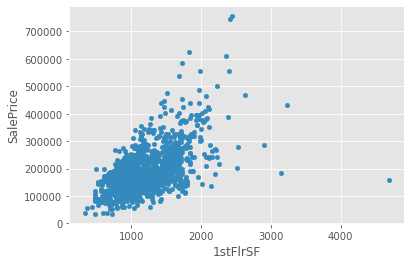

In [230]:
all_df.plot.scatter(x="1stFlrSF", y="SalePrice")

In [231]:
all_df[all_df["1stFlrSF"] > 4000]

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,...,ScreenPorch,PoolArea,Fence,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice,hasHighFacility
1298,1299,60,RL,313.0,63887,Pave,IR3,Bnk,AllPub,Corner,...,0,480,NaN,0,1,2008,New,Partial,160000.0,1
2549,2550,20,RL,128.0,39290,Pave,IR1,Bnk,AllPub,Inside,...,0,0,NaN,17000,10,2007,New,Partial,NaN,0


In [232]:
all_df = all_df[(all_df['BsmtFinSF1'] < 2000) | (all_df['SalePrice'].isnull())]
all_df = all_df[(all_df['TotalBsmtSF'] < 3000) | (all_df['SalePrice'].isnull())]
all_df = all_df[(all_df['GrLivArea'] < 4500) | (all_df['SalePrice'].isnull())]
all_df = all_df[(all_df['1stFlrSF'] < 2500) | (all_df['SalePrice'].isnull())]
all_df = all_df[(all_df['LotArea'] < 100000) | (all_df['SalePrice'].isnull())]

In [233]:
categories = categories.drop(["PoolQC","MiscFeature","Alley"])

In [234]:
for cat in categories:
    le = LabelEncoder()
    print(cat)
    
    all_df[cat].fillna("missing", inplace=True)    
    le = le.fit(all_df[cat])
    all_df[cat] = le.transform(all_df[cat])
    all_df[cat] = all_df[cat].astype("category")

MSZoning
Street
LotShape
LandContour
Utilities
LotConfig
LandSlope
Neighborhood
Condition1
Condition2
BldgType
HouseStyle
RoofStyle
RoofMatl
Exterior1st
Exterior2nd
MasVnrType
ExterQual
ExterCond
Foundation
BsmtQual
BsmtCond
BsmtExposure
BsmtFinType1
BsmtFinType2
Heating
HeatingQC
CentralAir
Electrical
KitchenQual
Functional
FireplaceQu
GarageType
GarageFinish
GarageQual
GarageCond
PavedDrive
Fence
SaleType
SaleCondition


In [235]:
train_df_le = all_df[~all_df["SalePrice"].isnull()] 
test_df_le = all_df[all_df["SalePrice"].isnull()] 

train_df_le["SalePrice_log"] = np.log(train_df_le["SalePrice"])
train_X = train_df_le.drop(["SalePrice","SalePrice_log", "Id"], axis=1)
train_Y = train_df_le["SalePrice_log"]

In [236]:
models = []
rmses = []
oof = np.zeros(len(train_X))

for train_index, val_index in kf.split(train_X):
    X_train = train_X.iloc[train_index]
    X_valid = train_X.iloc[val_index]
    y_train = train_Y.iloc[train_index]
    y_valid = train_Y.iloc[val_index]
        
    lgb_train = lgb.Dataset(X_train, y_train)
    lgb_eval = lgb.Dataset(X_valid, y_valid, reference=lgb_train)    
    
    model_lgb = lgb.train(lgbm_params, 
                          lgb_train, 
                          valid_sets=lgb_eval, 
                          num_boost_round=100,
                          early_stopping_rounds=20,
                          verbose_eval=10,
                         )    
    
    y_pred = model_lgb.predict(X_valid, num_iteration=model_lgb.best_iteration)
    tmp_rmse = np.sqrt(mean_squared_error(y_valid, y_pred))
    print(tmp_rmse)    
              
    models.append(model_lgb)    
    rmses.append(tmp_rmse)
    oof[val_index] = y_pred 

Training until validation scores don't improve for 20 rounds
[10]	valid_0's l2: 0.0424478
[20]	valid_0's l2: 0.0222118
[30]	valid_0's l2: 0.0175757
[40]	valid_0's l2: 0.0165142
[50]	valid_0's l2: 0.0164264
[60]	valid_0's l2: 0.016285
[70]	valid_0's l2: 0.0163922
[80]	valid_0's l2: 0.0163238
Early stopping, best iteration is:
[62]	valid_0's l2: 0.0162509
0.12745948164738202
Training until validation scores don't improve for 20 rounds
[10]	valid_0's l2: 0.047333
[20]	valid_0's l2: 0.0272932
[30]	valid_0's l2: 0.0223134
[40]	valid_0's l2: 0.0209381
[50]	valid_0's l2: 0.0203039
[60]	valid_0's l2: 0.0200215
[70]	valid_0's l2: 0.0197188
[80]	valid_0's l2: 0.0196559
[90]	valid_0's l2: 0.0195579
[100]	valid_0's l2: 0.0195231
Did not meet early stopping. Best iteration is:
[99]	valid_0's l2: 0.0195208
0.13971669031954484
Training until validation scores don't improve for 20 rounds
[10]	valid_0's l2: 0.0368757
[20]	valid_0's l2: 0.0197062
[30]	valid_0's l2: 0.0167971
[40]	valid_0's l2: 0.0158749

In [237]:
sum(rmses)/len(rmses)

0.13039701843269016

## 6. Feature Engineering

### 설명 변수의 확인하기: 특징량 생성

#### 시간과 관련된 변수의 통계량 확인하기

In [238]:
all_df[["YearBuilt","YearRemodAdd","GarageYrBlt","YrSold"]].describe()

,YearBuilt,YearRemodAdd,GarageYrBlt,YrSold
count,2904.000000,2904.000000,2745.000000,2904.000000
mean,1971.234504,1984.217975,1978.061202,2007.792011
std,30.319059,20.907346,25.600996,1.316366
min,1872.000000,1950.000000,1895.000000,2006.000000
25%,1953.000000,1965.000000,1960.000000,2007.000000
50%,1973.000000,1993.000000,1979.000000,2008.000000
75%,2001.000000,2004.000000,2002.000000,2009.000000
max,2010.000000,2010.000000,2207.000000,2010.000000


In [239]:
all_df["Age"] = all_df["YrSold"] - all_df["YearBuilt"]

In [240]:
train_df_le = all_df[~all_df["SalePrice"].isnull()] 
test_df_le = all_df[all_df["SalePrice"].isnull()] 

train_df_le["SalePrice_log"] = np.log(train_df_le["SalePrice"])
train_X = train_df_le.drop(["SalePrice","SalePrice_log","Id"], axis=1)
train_Y = train_df_le["SalePrice_log"]

In [241]:
models = []
rmses = []
oof = np.zeros(len(train_X))

for train_index, val_index in kf.split(train_X):
    X_train = train_X.iloc[train_index]
    X_valid = train_X.iloc[val_index]
    y_train = train_Y.iloc[train_index]
    y_valid = train_Y.iloc[val_index]
        
    lgb_train = lgb.Dataset(X_train, y_train)
    lgb_eval = lgb.Dataset(X_valid, y_valid, reference=lgb_train)    
    
    model_lgb = lgb.train(lgbm_params, 
                          lgb_train, 
                          valid_sets=lgb_eval, 
                          num_boost_round=100,
                          early_stopping_rounds=20,
                          verbose_eval=10,
                         )    
    
    y_pred = model_lgb.predict(X_valid, num_iteration=model_lgb.best_iteration)
    tmp_rmse = np.sqrt(mean_squared_error(y_valid, y_pred))
    print(tmp_rmse)    
              
    models.append(model_lgb)    
    rmses.append(tmp_rmse)
    oof[val_index] = y_pred 

Training until validation scores don't improve for 20 rounds
[10]	valid_0's l2: 0.0427712
[20]	valid_0's l2: 0.0222468
[30]	valid_0's l2: 0.0177147
[40]	valid_0's l2: 0.016571
[50]	valid_0's l2: 0.0161945
[60]	valid_0's l2: 0.0161879
[70]	valid_0's l2: 0.0161968
Early stopping, best iteration is:
[58]	valid_0's l2: 0.0161388
0.12704034420133195
Training until validation scores don't improve for 20 rounds
[10]	valid_0's l2: 0.0474374
[20]	valid_0's l2: 0.027474
[30]	valid_0's l2: 0.0225527
[40]	valid_0's l2: 0.0207551
[50]	valid_0's l2: 0.0202749
[60]	valid_0's l2: 0.0200399
[70]	valid_0's l2: 0.0198921
[80]	valid_0's l2: 0.0198431
[90]	valid_0's l2: 0.0197761
[100]	valid_0's l2: 0.019663
Did not meet early stopping. Best iteration is:
[100]	valid_0's l2: 0.019663
0.14022471834012856
Training until validation scores don't improve for 20 rounds
[10]	valid_0's l2: 0.0369248
[20]	valid_0's l2: 0.0195778
[30]	valid_0's l2: 0.016538
[40]	valid_0's l2: 0.0153916
[50]	valid_0's l2: 0.0149941
[

In [242]:
sum(rmses)/len(rmses)

0.12968959614926723

#### 넓이 변수로 새로운 특징량 작성하기

In [243]:
all_df[["LotArea","MasVnrArea","BsmtUnfSF","TotalBsmtSF", "1stFlrSF", "2ndFlrSF", "LowQualFinSF", "GrLivArea", "GarageArea","WoodDeckSF", "OpenPorchSF", "EnclosedPorch", "3SsnPorch", "ScreenPorch", "PoolArea", "LotFrontage"]].describe()

,LotArea,MasVnrArea,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,LotFrontage
count,2904.000000,2882.000000,2903.000000,2903.000000,2904.000000,2904.000000,2904.000000,2904.000000,2903.000000,2904.000000,2904.000000,2904.000000,2904.000000,2904.000000,2904.000000,2425.000000
mean,9912.604683,101.191187,559.850499,1043.794006,1152.707300,336.355372,4.718664,1493.781336,471.632794,93.265840,47.226584,22.988636,2.615702,16.086777,1.907025,69.071340
std,5178.128224,177.804595,438.438879,420.008348,377.291394,427.355787,46.515308,491.149725,214.551791,125.855568,67.195477,64.055325,25.252464,56.245764,33.082892,22.662001
min,1300.000000,0.000000,0.000000,0.000000,334.000000,0.000000,0.000000,334.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,21.000000
25%,7448.250000,0.000000,220.000000,791.500000,875.750000,0.000000,0.000000,1124.000000,319.500000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,59.000000
50%,9422.000000,0.000000,467.000000,988.000000,1080.000000,0.000000,0.000000,1441.000000,478.000000,0.000000,26.000000,0.000000,0.000000,0.000000,0.000000,68.000000
75%,11503.000000,164.000000,802.500000,1296.000000,1381.250000,704.000000,0.000000,1739.250000,576.000000,168.000000,69.250000,0.000000,0.000000,0.000000,0.000000,80.000000
max,70761.000000,1600.000000,2336.000000,5095.000000,5095.000000,1872.000000,1064.000000,5095.000000,1488.000000,1424.000000,742.000000,1012.000000,508.000000,576.000000,800.000000,313.000000


In [244]:
all_df["TotalSF"] = all_df["TotalBsmtSF"] + all_df["1stFlrSF"] + all_df["2ndFlrSF"]
all_df["Total_Bathrooms"] = all_df["FullBath"] + all_df["HalfBath"] + all_df["BsmtFullBath"] + all_df["BsmtHalfBath"]

In [245]:
all_df["Total_PorchSF"] = all_df["WoodDeckSF"] + all_df["OpenPorchSF"] + all_df["EnclosedPorch"] + all_df["3SsnPorch"] + all_df["ScreenPorch"]

In [246]:
all_df["hasPorch"] = all_df["Total_PorchSF"].apply(lambda x: 1 if x > 0 else 0)
all_df = all_df.drop("Total_PorchSF",axis=1)

In [247]:
train_df_le = all_df[~all_df["SalePrice"].isnull()] 
test_df_le = all_df[all_df["SalePrice"].isnull()] 

train_df_le["SalePrice_log"] = np.log(train_df_le["SalePrice"])
train_X = train_df_le.drop(["SalePrice","SalePrice_log","Id"], axis=1)
train_Y = train_df_le["SalePrice_log"]

In [248]:
models = []
rmses = []
oof = np.zeros(len(train_X))

for train_index, val_index in kf.split(train_X):
    X_train = train_X.iloc[train_index]
    X_valid = train_X.iloc[val_index]
    y_train = train_Y.iloc[train_index]
    y_valid = train_Y.iloc[val_index]
        
    lgb_train = lgb.Dataset(X_train, y_train)
    lgb_eval = lgb.Dataset(X_valid, y_valid, reference=lgb_train)    
    
    model_lgb = lgb.train(lgbm_params, 
                          lgb_train, 
                          valid_sets=lgb_eval, 
                          num_boost_round=100,
                          early_stopping_rounds=20,
                          verbose_eval=10,
                         )    
    
    y_pred = model_lgb.predict(X_valid, num_iteration=model_lgb.best_iteration)
    tmp_rmse = np.sqrt(mean_squared_error(y_valid, y_pred))
    print(tmp_rmse)    
              
    models.append(model_lgb)    
    rmses.append(tmp_rmse)
    oof[val_index] = y_pred 

Training until validation scores don't improve for 20 rounds
[10]	valid_0's l2: 0.0388049
[20]	valid_0's l2: 0.0199263
[30]	valid_0's l2: 0.0165969
[40]	valid_0's l2: 0.0158728
[50]	valid_0's l2: 0.0157388
[60]	valid_0's l2: 0.015844
Early stopping, best iteration is:
[49]	valid_0's l2: 0.0157164
0.12536497336459065
Training until validation scores don't improve for 20 rounds
[10]	valid_0's l2: 0.0459281
[20]	valid_0's l2: 0.0262784
[30]	valid_0's l2: 0.0217831
[40]	valid_0's l2: 0.0205294
[50]	valid_0's l2: 0.0201039
[60]	valid_0's l2: 0.0198874
[70]	valid_0's l2: 0.019815
[80]	valid_0's l2: 0.0198968
Early stopping, best iteration is:
[65]	valid_0's l2: 0.0197659
0.14059120440349726
Training until validation scores don't improve for 20 rounds
[10]	valid_0's l2: 0.0354828
[20]	valid_0's l2: 0.0183241
[30]	valid_0's l2: 0.0154847
[40]	valid_0's l2: 0.0145868
[50]	valid_0's l2: 0.0143982
[60]	valid_0's l2: 0.0142851
[70]	valid_0's l2: 0.0144113
Early stopping, best iteration is:
[56]	va

In [249]:
sum(rmses)/len(rmses)

0.128396868966143

## 7. Hyper Parameter Optimization

### 하이퍼파라미터 최적화하기

#### Optuna를 이용해 하이퍼파라미터 최적화하기

In [250]:
import optuna

In [251]:
from sklearn.model_selection import train_test_split

In [252]:
X_train, X_valid, y_train, y_valid = train_test_split(train_X, train_Y, test_size=0.2, random_state=1234, shuffle=False,  stratify=None)

In [253]:
def objective(trial):
    params = {
        "objective":"regression",
        "random_seed":1234,
        "learning_rate":0.05,        
        "n_estimators":1000,        
        
        "num_leaves":trial.suggest_int("num_leaves",4,64),
        "max_bin":trial.suggest_int("max_bin",50,200),        
        "bagging_fraction":trial.suggest_uniform("bagging_fraction",0.4,0.9),
        "bagging_freq":trial.suggest_int("bagging_freq",1,10),
        "feature_fraction":trial.suggest_uniform("feature_fraction",0.4,0.9),
        "min_data_in_leaf":trial.suggest_int("min_data_in_leaf",2,16),                
        "min_sum_hessian_in_leaf":trial.suggest_int("min_sum_hessian_in_leaf",1,10),
    }
    
    lgb_train = lgb.Dataset(X_train, y_train)
    lgb_eval = lgb.Dataset(X_valid, y_valid, reference=lgb_train)    
    
    model_lgb = lgb.train(params, lgb_train, 
                          valid_sets=lgb_eval, 
                          num_boost_round=100,
                          early_stopping_rounds=20,
                          verbose_eval=10,)    
    
    y_pred = model_lgb.predict(X_valid, num_iteration=model_lgb.best_iteration)
    score =  np.sqrt(mean_squared_error(y_valid, y_pred))
    
    return score

In [254]:
study = optuna.create_study(sampler=optuna.samplers.RandomSampler(seed=0))
study.optimize(objective, n_trials=50)
study.best_params

[I 2021-09-01 21:45:23,755] Trial 0 finished with value: 0.12276258472625201 and parameters: {'num_leaves': 48, 'max_bin': 97, 'bagging_fraction': 0.7575946831862097, 'bagging_freq': 4, 'feature_fraction': 0.8289728088113784, 'min_data_in_leaf': 9, 'min_sum_hessian_in_leaf': 10}. Best is trial 0 with value: 0.12276258472625201.


Training until validation scores don't improve for 20 rounds
[10]	valid_0's l2: 0.0631933
[20]	valid_0's l2: 0.0342271
[30]	valid_0's l2: 0.0232913
[40]	valid_0's l2: 0.018477
[50]	valid_0's l2: 0.016522
[60]	valid_0's l2: 0.0159215
[70]	valid_0's l2: 0.0156131
[80]	valid_0's l2: 0.0153698
[90]	valid_0's l2: 0.0150728
[100]	valid_0's l2: 0.0151499
[110]	valid_0's l2: 0.0151716
Early stopping, best iteration is:
[92]	valid_0's l2: 0.0150707


[I 2021-09-01 21:45:23,996] Trial 1 finished with value: 0.1193487517583833 and parameters: {'num_leaves': 23, 'max_bin': 71, 'bagging_fraction': 0.5921908536463499, 'bagging_freq': 8, 'feature_fraction': 0.8458865003910399, 'min_data_in_leaf': 10, 'min_sum_hessian_in_leaf': 2}. Best is trial 1 with value: 0.1193487517583833.


Training until validation scores don't improve for 20 rounds
[10]	valid_0's l2: 0.0651533
[20]	valid_0's l2: 0.0358552
[30]	valid_0's l2: 0.0242788
[40]	valid_0's l2: 0.0193943
[50]	valid_0's l2: 0.0169396
[60]	valid_0's l2: 0.0157434
[70]	valid_0's l2: 0.0152226
[80]	valid_0's l2: 0.0147995
[90]	valid_0's l2: 0.0145151
[100]	valid_0's l2: 0.0144281
[110]	valid_0's l2: 0.014379
[120]	valid_0's l2: 0.014295
[130]	valid_0's l2: 0.0143102
[140]	valid_0's l2: 0.0143303
[150]	valid_0's l2: 0.0144383
Early stopping, best iteration is:
[136]	valid_0's l2: 0.0142441


[I 2021-09-01 21:45:24,236] Trial 2 finished with value: 0.11789737616813875 and parameters: {'num_leaves': 42, 'max_bin': 89, 'bagging_fraction': 0.6644474598764523, 'bagging_freq': 9, 'feature_fraction': 0.5963923980504149, 'min_data_in_leaf': 11, 'min_sum_hessian_in_leaf': 9}. Best is trial 2 with value: 0.11789737616813875.


Training until validation scores don't improve for 20 rounds
[10]	valid_0's l2: 0.0669905
[20]	valid_0's l2: 0.0380562
[30]	valid_0's l2: 0.0253912
[40]	valid_0's l2: 0.0199895
[50]	valid_0's l2: 0.0172562
[60]	valid_0's l2: 0.0158992
[70]	valid_0's l2: 0.0150053
[80]	valid_0's l2: 0.014437
[90]	valid_0's l2: 0.0142461
[100]	valid_0's l2: 0.0140593
[110]	valid_0's l2: 0.0139402
[120]	valid_0's l2: 0.0139667
[130]	valid_0's l2: 0.0140968
Early stopping, best iteration is:
[114]	valid_0's l2: 0.0138998


[I 2021-09-01 21:45:24,456] Trial 3 finished with value: 0.12725984420347763 and parameters: {'num_leaves': 13, 'max_bin': 198, 'bagging_fraction': 0.4101091987201629, 'bagging_freq': 4, 'feature_fraction': 0.8785775794765232, 'min_data_in_leaf': 2, 'min_sum_hessian_in_leaf': 3}. Best is trial 2 with value: 0.11789737616813875.


Training until validation scores don't improve for 20 rounds
[10]	valid_0's l2: 0.0715431
[20]	valid_0's l2: 0.0416393
[30]	valid_0's l2: 0.0282611
[40]	valid_0's l2: 0.0228381
[50]	valid_0's l2: 0.0203253
[60]	valid_0's l2: 0.0182057
[70]	valid_0's l2: 0.017468
[80]	valid_0's l2: 0.0170004
[90]	valid_0's l2: 0.01682
[100]	valid_0's l2: 0.0168007
[110]	valid_0's l2: 0.0164673
[120]	valid_0's l2: 0.0162936
[130]	valid_0's l2: 0.0163083
[140]	valid_0's l2: 0.0162778
[150]	valid_0's l2: 0.0162922
Early stopping, best iteration is:
[134]	valid_0's l2: 0.0161951


[I 2021-09-01 21:45:24,670] Trial 4 finished with value: 0.12576146109641942 and parameters: {'num_leaves': 39, 'max_bin': 79, 'bagging_fraction': 0.7902645881432278, 'bagging_freq': 8, 'feature_fraction': 0.7199605106637619, 'min_data_in_leaf': 11, 'min_sum_hessian_in_leaf': 10}. Best is trial 2 with value: 0.11789737616813875.


Training until validation scores don't improve for 20 rounds
[10]	valid_0's l2: 0.0648042
[20]	valid_0's l2: 0.0354626
[30]	valid_0's l2: 0.0241893
[40]	valid_0's l2: 0.0195295
[50]	valid_0's l2: 0.0177365
[60]	valid_0's l2: 0.0170448
[70]	valid_0's l2: 0.0165482
[80]	valid_0's l2: 0.0160904
[90]	valid_0's l2: 0.015868
[100]	valid_0's l2: 0.015876
[110]	valid_0's l2: 0.0158811
Early stopping, best iteration is:
[92]	valid_0's l2: 0.0158159


[I 2021-09-01 21:45:24,961] Trial 5 finished with value: 0.12043665578274661 and parameters: {'num_leaves': 36, 'max_bin': 81, 'bagging_fraction': 0.4529538035938961, 'bagging_freq': 8, 'feature_fraction': 0.5322778060523135, 'min_data_in_leaf': 13, 'min_sum_hessian_in_leaf': 3}. Best is trial 2 with value: 0.11789737616813875.


Training until validation scores don't improve for 20 rounds
[10]	valid_0's l2: 0.0666852
[20]	valid_0's l2: 0.0381927
[30]	valid_0's l2: 0.0258688
[40]	valid_0's l2: 0.0210388
[50]	valid_0's l2: 0.0176793
[60]	valid_0's l2: 0.0163684
[70]	valid_0's l2: 0.0158086
[80]	valid_0's l2: 0.0154255
[90]	valid_0's l2: 0.0151315
[100]	valid_0's l2: 0.0149063
[110]	valid_0's l2: 0.0146942
[120]	valid_0's l2: 0.0146015
[130]	valid_0's l2: 0.0145217
[140]	valid_0's l2: 0.0145263
[150]	valid_0's l2: 0.0145754
Early stopping, best iteration is:
[139]	valid_0's l2: 0.014505


[I 2021-09-01 21:45:25,220] Trial 6 finished with value: 0.12009322984549489 and parameters: {'num_leaves': 59, 'max_bin': 78, 'bagging_fraction': 0.6842169744343243, 'bagging_freq': 1, 'feature_fraction': 0.5620705038966071, 'min_data_in_leaf': 7, 'min_sum_hessian_in_leaf': 7}. Best is trial 2 with value: 0.11789737616813875.


Training until validation scores don't improve for 20 rounds
[10]	valid_0's l2: 0.0655023
[20]	valid_0's l2: 0.0350319
[30]	valid_0's l2: 0.0232855
[40]	valid_0's l2: 0.018711
[50]	valid_0's l2: 0.0165396
[60]	valid_0's l2: 0.0154373
[70]	valid_0's l2: 0.0149413
[80]	valid_0's l2: 0.0147072
[90]	valid_0's l2: 0.0145249
[100]	valid_0's l2: 0.014458
[110]	valid_0's l2: 0.0144428
Early stopping, best iteration is:
[94]	valid_0's l2: 0.0144224


[I 2021-09-01 21:45:25,492] Trial 7 finished with value: 0.12193994753361309 and parameters: {'num_leaves': 44, 'max_bin': 67, 'bagging_fraction': 0.8718740392573121, 'bagging_freq': 10, 'feature_fraction': 0.6249749949556138, 'min_data_in_leaf': 10, 'min_sum_hessian_in_leaf': 2}. Best is trial 2 with value: 0.11789737616813875.


Training until validation scores don't improve for 20 rounds
[10]	valid_0's l2: 0.0652228
[20]	valid_0's l2: 0.0354018
[30]	valid_0's l2: 0.024182
[40]	valid_0's l2: 0.0196142
[50]	valid_0's l2: 0.0175439
[60]	valid_0's l2: 0.0165408
[70]	valid_0's l2: 0.0158706
[80]	valid_0's l2: 0.0156124
[90]	valid_0's l2: 0.0153711
[100]	valid_0's l2: 0.0151307
[110]	valid_0's l2: 0.0150694
[120]	valid_0's l2: 0.0150335
[130]	valid_0's l2: 0.0149802
[140]	valid_0's l2: 0.0149145
[150]	valid_0's l2: 0.0148989
[160]	valid_0's l2: 0.0149184
[170]	valid_0's l2: 0.0149734
Early stopping, best iteration is:
[156]	valid_0's l2: 0.0148693


[I 2021-09-01 21:45:25,674] Trial 8 finished with value: 0.12154576713911017 and parameters: {'num_leaves': 5, 'max_bin': 107, 'bagging_fraction': 0.7333833577228339, 'bagging_freq': 8, 'feature_fraction': 0.4854547925680226, 'min_data_in_leaf': 4, 'min_sum_hessian_in_leaf': 1}. Best is trial 2 with value: 0.11789737616813875.


Training until validation scores don't improve for 20 rounds
[10]	valid_0's l2: 0.0791497
[20]	valid_0's l2: 0.0491884
[30]	valid_0's l2: 0.0344455
[40]	valid_0's l2: 0.0265807
[50]	valid_0's l2: 0.0229139
[60]	valid_0's l2: 0.0208827
[70]	valid_0's l2: 0.0194271
[80]	valid_0's l2: 0.0186142
[90]	valid_0's l2: 0.0176055
[100]	valid_0's l2: 0.0167569
[110]	valid_0's l2: 0.0164596
[120]	valid_0's l2: 0.0163162
[130]	valid_0's l2: 0.0159441
[140]	valid_0's l2: 0.0157307
[150]	valid_0's l2: 0.0155412
[160]	valid_0's l2: 0.0154876
[170]	valid_0's l2: 0.0153213
[180]	valid_0's l2: 0.0151703
[190]	valid_0's l2: 0.0150099
[200]	valid_0's l2: 0.0148162
[210]	valid_0's l2: 0.0148204
[220]	valid_0's l2: 0.0147811
Early stopping, best iteration is:
[206]	valid_0's l2: 0.0147734
Training until validation scores don't improve for 20 rounds
[10]	valid_0's l2: 0.0678227


[I 2021-09-01 21:45:25,882] Trial 9 finished with value: 0.1156880627404939 and parameters: {'num_leaves': 18, 'max_bin': 149, 'bagging_fraction': 0.5818553854713113, 'bagging_freq': 10, 'feature_fraction': 0.4192127132363674, 'min_data_in_leaf': 13, 'min_sum_hessian_in_leaf': 5}. Best is trial 9 with value: 0.1156880627404939.


[20]	valid_0's l2: 0.0381443
[30]	valid_0's l2: 0.0260709
[40]	valid_0's l2: 0.0203764
[50]	valid_0's l2: 0.0172206
[60]	valid_0's l2: 0.0152952
[70]	valid_0's l2: 0.0145722
[80]	valid_0's l2: 0.0144093
[90]	valid_0's l2: 0.013966
[100]	valid_0's l2: 0.0136095
[110]	valid_0's l2: 0.0136175
[120]	valid_0's l2: 0.0134987
[130]	valid_0's l2: 0.0134918
[140]	valid_0's l2: 0.0134816
[150]	valid_0's l2: 0.0134692
[160]	valid_0's l2: 0.0134142
[170]	valid_0's l2: 0.0133838
[180]	valid_0's l2: 0.0135028
Early stopping, best iteration is:
[166]	valid_0's l2: 0.0133837


[I 2021-09-01 21:45:26,065] Trial 10 finished with value: 0.11950158333633985 and parameters: {'num_leaves': 10, 'max_bin': 97, 'bagging_fraction': 0.5044383780474173, 'bagging_freq': 4, 'feature_fraction': 0.8976497838389439, 'min_data_in_leaf': 6, 'min_sum_hessian_in_leaf': 9}. Best is trial 9 with value: 0.1156880627404939.


Training until validation scores don't improve for 20 rounds
[10]	valid_0's l2: 0.0719023
[20]	valid_0's l2: 0.0422866
[30]	valid_0's l2: 0.0283701
[40]	valid_0's l2: 0.0220445
[50]	valid_0's l2: 0.0189171
[60]	valid_0's l2: 0.0172487
[70]	valid_0's l2: 0.0159837
[80]	valid_0's l2: 0.0151737
[90]	valid_0's l2: 0.0148282
[100]	valid_0's l2: 0.0145798
[110]	valid_0's l2: 0.0144291
[120]	valid_0's l2: 0.0142945
[130]	valid_0's l2: 0.0143772
[140]	valid_0's l2: 0.0144
Early stopping, best iteration is:
[121]	valid_0's l2: 0.0142806
Training until validation scores don't improve for 20 rounds


[I 2021-09-01 21:45:26,281] Trial 11 finished with value: 0.11520124732103115 and parameters: {'num_leaves': 18, 'max_bin': 193, 'bagging_fraction': 0.6373487511442064, 'bagging_freq': 8, 'feature_fraction': 0.5690038074194459, 'min_data_in_leaf': 7, 'min_sum_hessian_in_leaf': 6}. Best is trial 11 with value: 0.11520124732103115.


[10]	valid_0's l2: 0.0664449
[20]	valid_0's l2: 0.0378325
[30]	valid_0's l2: 0.0254969
[40]	valid_0's l2: 0.019735
[50]	valid_0's l2: 0.0170911
[60]	valid_0's l2: 0.0157007
[70]	valid_0's l2: 0.0146983
[80]	valid_0's l2: 0.0140428
[90]	valid_0's l2: 0.0137639
[100]	valid_0's l2: 0.0137234
[110]	valid_0's l2: 0.013545
[120]	valid_0's l2: 0.0134015
[130]	valid_0's l2: 0.0133588
[140]	valid_0's l2: 0.0133355
[150]	valid_0's l2: 0.0132841
[160]	valid_0's l2: 0.0133376
[170]	valid_0's l2: 0.0133664
Early stopping, best iteration is:
[153]	valid_0's l2: 0.0132713


[I 2021-09-01 21:45:26,583] Trial 12 finished with value: 0.12062875838994816 and parameters: {'num_leaves': 52, 'max_bin': 99, 'bagging_fraction': 0.7891727410129545, 'bagging_freq': 4, 'feature_fraction': 0.5843625853304821, 'min_data_in_leaf': 7, 'min_sum_hessian_in_leaf': 1}. Best is trial 11 with value: 0.11520124732103115.


Training until validation scores don't improve for 20 rounds
[10]	valid_0's l2: 0.0642757
[20]	valid_0's l2: 0.0351934
[30]	valid_0's l2: 0.0235784
[40]	valid_0's l2: 0.0188561
[50]	valid_0's l2: 0.0167737
[60]	valid_0's l2: 0.0157427
[70]	valid_0's l2: 0.0152101
[80]	valid_0's l2: 0.0149861
[90]	valid_0's l2: 0.0147908
[100]	valid_0's l2: 0.0146253
[110]	valid_0's l2: 0.0146249
[120]	valid_0's l2: 0.0145513
[130]	valid_0's l2: 0.0145706
[140]	valid_0's l2: 0.0146053
Early stopping, best iteration is:
[120]	valid_0's l2: 0.0145513


[I 2021-09-01 21:45:26,831] Trial 13 finished with value: 0.11892366876986146 and parameters: {'num_leaves': 53, 'max_bin': 86, 'bagging_fraction': 0.44804920394698156, 'bagging_freq': 4, 'feature_fraction': 0.6343256008238508, 'min_data_in_leaf': 15, 'min_sum_hessian_in_leaf': 1}. Best is trial 11 with value: 0.11520124732103115.


Training until validation scores don't improve for 20 rounds
[10]	valid_0's l2: 0.0674837
[20]	valid_0's l2: 0.0381479
[30]	valid_0's l2: 0.0259577
[40]	valid_0's l2: 0.020897
[50]	valid_0's l2: 0.0175726
[60]	valid_0's l2: 0.0162852
[70]	valid_0's l2: 0.0153687
[80]	valid_0's l2: 0.0148774
[90]	valid_0's l2: 0.01464
[100]	valid_0's l2: 0.0144573
[110]	valid_0's l2: 0.0143134
[120]	valid_0's l2: 0.0142268
[130]	valid_0's l2: 0.0142814
[140]	valid_0's l2: 0.0145269
Early stopping, best iteration is:
[123]	valid_0's l2: 0.0141428


[I 2021-09-01 21:45:27,109] Trial 14 finished with value: 0.12104212027669303 and parameters: {'num_leaves': 43, 'max_bin': 199, 'bagging_fraction': 0.7696317896991509, 'bagging_freq': 1, 'feature_fraction': 0.6208554606244228, 'min_data_in_leaf': 13, 'min_sum_hessian_in_leaf': 8}. Best is trial 11 with value: 0.11520124732103115.


Training until validation scores don't improve for 20 rounds
[10]	valid_0's l2: 0.0655086
[20]	valid_0's l2: 0.0358043
[30]	valid_0's l2: 0.0241632
[40]	valid_0's l2: 0.0191799
[50]	valid_0's l2: 0.016904
[60]	valid_0's l2: 0.0160508
[70]	valid_0's l2: 0.0154147
[80]	valid_0's l2: 0.0152532
[90]	valid_0's l2: 0.0149321
[100]	valid_0's l2: 0.0147486
[110]	valid_0's l2: 0.0146988
[120]	valid_0's l2: 0.0146885
[130]	valid_0's l2: 0.0146563
[140]	valid_0's l2: 0.0146844
[150]	valid_0's l2: 0.0147153
Early stopping, best iteration is:
[134]	valid_0's l2: 0.0146512
Training until validation scores don't improve for 20 rounds
[10]	valid_0's l2: 0.0631429
[20]	valid_0's l2: 0.0335439
[30]	valid_0's l2: 0.0228938
[40]	valid_0's l2: 0.0187439
[50]	valid_0's l2: 0.0171492
[60]	valid_0's l2: 0.0166351
[70]	valid_0's l2: 0.0163722
[80]	valid_0's l2: 0.0161953
[90]	valid_0's l2: 0.0160437
[100]	valid_0's l2: 0.0160019
[110]	valid_0's l2: 0.0160188
Early stopping, best iteration is:
[99]	valid_0's l2

[I 2021-09-01 21:45:27,442] Trial 15 finished with value: 0.1264174627845185 and parameters: {'num_leaves': 63, 'max_bin': 180, 'bagging_fraction': 0.7443305914028853, 'bagging_freq': 4, 'feature_fraction': 0.8591177331810724, 'min_data_in_leaf': 5, 'min_sum_hessian_in_leaf': 3}. Best is trial 11 with value: 0.11520124732103115.


Training until validation scores don't improve for 20 rounds
[10]	valid_0's l2: 0.065279
[20]	valid_0's l2: 0.0357655
[30]	valid_0's l2: 0.0248306
[40]	valid_0's l2: 0.0203667
[50]	valid_0's l2: 0.0186498
[60]	valid_0's l2: 0.0176813
[70]	valid_0's l2: 0.017777
[80]	valid_0's l2: 0.0174758
[90]	valid_0's l2: 0.0172516
[100]	valid_0's l2: 0.0171891
[110]	valid_0's l2: 0.0172672
Early stopping, best iteration is:
[99]	valid_0's l2: 0.0171684


[I 2021-09-01 21:45:27,746] Trial 16 finished with value: 0.13102824936985472 and parameters: {'num_leaves': 50, 'max_bin': 198, 'bagging_fraction': 0.5326947454697227, 'bagging_freq': 10, 'feature_fraction': 0.8605788051185999, 'min_data_in_leaf': 6, 'min_sum_hessian_in_leaf': 7}. Best is trial 11 with value: 0.11520124732103115.
[I 2021-09-01 21:45:28,037] Trial 17 finished with value: 0.12253890280799139 and parameters: {'num_leaves': 47, 'max_bin': 154, 'bagging_fraction': 0.7337051899818409, 'bagging_freq': 4, 'feature_fraction': 0.7235870700937778, 'min_data_in_leaf': 8, 'min_sum_hessian_in_leaf': 1}. Best is trial 11 with value: 0.11520124732103115.


Training until validation scores don't improve for 20 rounds
[10]	valid_0's l2: 0.0639854
[20]	valid_0's l2: 0.0344951
[30]	valid_0's l2: 0.0230682
[40]	valid_0's l2: 0.0186061
[50]	valid_0's l2: 0.016517
[60]	valid_0's l2: 0.0159207
[70]	valid_0's l2: 0.0156671
[80]	valid_0's l2: 0.0154089
[90]	valid_0's l2: 0.0151898
[100]	valid_0's l2: 0.0150158
[110]	valid_0's l2: 0.0150865
[120]	valid_0's l2: 0.0151025
Early stopping, best iteration is:
[100]	valid_0's l2: 0.0150158


[I 2021-09-01 21:45:28,313] Trial 18 finished with value: 0.11718948429727712 and parameters: {'num_leaves': 42, 'max_bin': 69, 'bagging_fraction': 0.5989103763793145, 'bagging_freq': 4, 'feature_fraction': 0.4100537730937468, 'min_data_in_leaf': 10, 'min_sum_hessian_in_leaf': 9}. Best is trial 11 with value: 0.11520124732103115.


Training until validation scores don't improve for 20 rounds
[10]	valid_0's l2: 0.0685173
[20]	valid_0's l2: 0.0374783
[30]	valid_0's l2: 0.0247979
[40]	valid_0's l2: 0.0193321
[50]	valid_0's l2: 0.0168489
[60]	valid_0's l2: 0.0155159
[70]	valid_0's l2: 0.0147335
[80]	valid_0's l2: 0.014414
[90]	valid_0's l2: 0.0142724
[100]	valid_0's l2: 0.0140229
[110]	valid_0's l2: 0.0139219
[120]	valid_0's l2: 0.0137687
[130]	valid_0's l2: 0.0138399
[140]	valid_0's l2: 0.0137987
[150]	valid_0's l2: 0.0137709
Early stopping, best iteration is:
[135]	valid_0's l2: 0.0137334


[I 2021-09-01 21:45:28,530] Trial 19 finished with value: 0.11350644773953272 and parameters: {'num_leaves': 6, 'max_bin': 53, 'bagging_fraction': 0.7518686396449581, 'bagging_freq': 1, 'feature_fraction': 0.5243765717599791, 'min_data_in_leaf': 5, 'min_sum_hessian_in_leaf': 9}. Best is trial 19 with value: 0.11350644773953272.


Training until validation scores don't improve for 20 rounds
[10]	valid_0's l2: 0.0773156
[20]	valid_0's l2: 0.0469604
[30]	valid_0's l2: 0.0318485
[40]	valid_0's l2: 0.0249991
[50]	valid_0's l2: 0.0207622
[60]	valid_0's l2: 0.0185333
[70]	valid_0's l2: 0.0171173
[80]	valid_0's l2: 0.0160234
[90]	valid_0's l2: 0.0151094
[100]	valid_0's l2: 0.0146898
[110]	valid_0's l2: 0.0142039
[120]	valid_0's l2: 0.0138643
[130]	valid_0's l2: 0.0136435
[140]	valid_0's l2: 0.0135067
[150]	valid_0's l2: 0.013333
[160]	valid_0's l2: 0.0131863
[170]	valid_0's l2: 0.013139
[180]	valid_0's l2: 0.01302
[190]	valid_0's l2: 0.0129736
[200]	valid_0's l2: 0.0129593
[210]	valid_0's l2: 0.0129834
[220]	valid_0's l2: 0.0129492
[230]	valid_0's l2: 0.0128937
[240]	valid_0's l2: 0.0129446
Early stopping, best iteration is:
[226]	valid_0's l2: 0.0128837
Training until validation scores don't improve for 20 rounds
[10]	valid_0's l2: 0.0664617
[20]	valid_0's l2: 0.0372202
[30]	valid_0's l2: 0.0252919
[40]	valid_0's l2: 

[I 2021-09-01 21:45:28,828] Trial 20 finished with value: 0.12102390151064553 and parameters: {'num_leaves': 30, 'max_bin': 117, 'bagging_fraction': 0.8763745057584925, 'bagging_freq': 1, 'feature_fraction': 0.8232043362355639, 'min_data_in_leaf': 15, 'min_sum_hessian_in_leaf': 7}. Best is trial 19 with value: 0.11350644773953272.
[I 2021-09-01 21:45:29,044] Trial 21 finished with value: 0.11795821033890806 and parameters: {'num_leaves': 17, 'max_bin': 171, 'bagging_fraction': 0.5982528704234924, 'bagging_freq': 9, 'feature_fraction': 0.5248981378274891, 'min_data_in_leaf': 15, 'min_sum_hessian_in_leaf': 6}. Best is trial 19 with value: 0.11350644773953272.


Training until validation scores don't improve for 20 rounds
[10]	valid_0's l2: 0.0681367
[20]	valid_0's l2: 0.039897
[30]	valid_0's l2: 0.0266884
[40]	valid_0's l2: 0.0208486
[50]	valid_0's l2: 0.017708
[60]	valid_0's l2: 0.0164692
[70]	valid_0's l2: 0.0155495
[80]	valid_0's l2: 0.0149528
[90]	valid_0's l2: 0.0145181
[100]	valid_0's l2: 0.0142513
[110]	valid_0's l2: 0.0139898
[120]	valid_0's l2: 0.0139363
[130]	valid_0's l2: 0.014012
Early stopping, best iteration is:
[115]	valid_0's l2: 0.0139141
Training until validation scores don't improve for 20 rounds
[10]	valid_0's l2: 0.0652907
[20]	valid_0's l2: 0.0357602
[30]	valid_0's l2: 0.023939
[40]	valid_0's l2: 0.0193971
[50]	valid_0's l2: 0.0168319
[60]	valid_0's l2: 0.0152879
[70]	valid_0's l2: 0.0146316
[80]	valid_0's l2: 0.0143111
[90]	valid_0's l2: 0.0140694
[100]	valid_0's l2: 0.0138307
[110]	valid_0's l2: 0.0140426
[120]	valid_0's l2: 0.0140434


[I 2021-09-01 21:45:29,395] Trial 22 finished with value: 0.1175927245148568 and parameters: {'num_leaves': 50, 'max_bin': 75, 'bagging_fraction': 0.6942325425343747, 'bagging_freq': 10, 'feature_fraction': 0.6506621909633512, 'min_data_in_leaf': 15, 'min_sum_hessian_in_leaf': 4}. Best is trial 19 with value: 0.11350644773953272.


Early stopping, best iteration is:
[101]	valid_0's l2: 0.013828
Training until validation scores don't improve for 20 rounds
[10]	valid_0's l2: 0.0653486
[20]	valid_0's l2: 0.0360925
[30]	valid_0's l2: 0.0245766


[I 2021-09-01 21:45:29,662] Trial 23 finished with value: 0.12027699335809947 and parameters: {'num_leaves': 37, 'max_bin': 154, 'bagging_fraction': 0.6119275242790898, 'bagging_freq': 10, 'feature_fraction': 0.6350660946278825, 'min_data_in_leaf': 15, 'min_sum_hessian_in_leaf': 8}. Best is trial 19 with value: 0.11350644773953272.


[40]	valid_0's l2: 0.0198197
[50]	valid_0's l2: 0.0172251
[60]	valid_0's l2: 0.0157714
[70]	valid_0's l2: 0.0152519
[80]	valid_0's l2: 0.014965
[90]	valid_0's l2: 0.0146088
[100]	valid_0's l2: 0.0144942
[110]	valid_0's l2: 0.0144956
Early stopping, best iteration is:
[97]	valid_0's l2: 0.0144666
Training until validation scores don't improve for 20 rounds
[10]	valid_0's l2: 0.0653605
[20]	valid_0's l2: 0.0365877
[30]	valid_0's l2: 0.0239185
[40]	valid_0's l2: 0.0188236
[50]	valid_0's l2: 0.0163389
[60]	valid_0's l2: 0.0151344
[70]	valid_0's l2: 0.0145295
[80]	valid_0's l2: 0.0140773
[90]	valid_0's l2: 0.0138752
[100]	valid_0's l2: 0.0136938
[110]	valid_0's l2: 0.0136791
[120]	valid_0's l2: 0.0135096
[130]	valid_0's l2: 0.0135173
[140]	valid_0's l2: 0.0135729


[I 2021-09-01 21:45:30,023] Trial 24 finished with value: 0.11601154786351536 and parameters: {'num_leaves': 60, 'max_bin': 129, 'bagging_fraction': 0.7745849185763624, 'bagging_freq': 9, 'feature_fraction': 0.46773703211122514, 'min_data_in_leaf': 13, 'min_sum_hessian_in_leaf': 7}. Best is trial 19 with value: 0.11350644773953272.


Early stopping, best iteration is:
[123]	valid_0's l2: 0.0134587
Training until validation scores don't improve for 20 rounds
[10]	valid_0's l2: 0.0649906


[I 2021-09-01 21:45:30,367] Trial 25 finished with value: 0.12164927163622608 and parameters: {'num_leaves': 51, 'max_bin': 143, 'bagging_fraction': 0.6954363806240866, 'bagging_freq': 7, 'feature_fraction': 0.7266004099285668, 'min_data_in_leaf': 15, 'min_sum_hessian_in_leaf': 9}. Best is trial 19 with value: 0.11350644773953272.


[20]	valid_0's l2: 0.0354846
[30]	valid_0's l2: 0.023581
[40]	valid_0's l2: 0.0192003
[50]	valid_0's l2: 0.0171611
[60]	valid_0's l2: 0.016061
[70]	valid_0's l2: 0.0155616
[80]	valid_0's l2: 0.0152317
[90]	valid_0's l2: 0.0149445
[100]	valid_0's l2: 0.0148134
[110]	valid_0's l2: 0.014851
[120]	valid_0's l2: 0.0148768
Early stopping, best iteration is:
[103]	valid_0's l2: 0.0147985


[I 2021-09-01 21:45:30,570] Trial 26 finished with value: 0.11583974477698317 and parameters: {'num_leaves': 7, 'max_bin': 53, 'bagging_fraction': 0.5837809350239482, 'bagging_freq': 7, 'feature_fraction': 0.8920211206820732, 'min_data_in_leaf': 16, 'min_sum_hessian_in_leaf': 6}. Best is trial 19 with value: 0.11350644773953272.


Training until validation scores don't improve for 20 rounds
[10]	valid_0's l2: 0.0735027
[20]	valid_0's l2: 0.0439861
[30]	valid_0's l2: 0.0300932
[40]	valid_0's l2: 0.0233419
[50]	valid_0's l2: 0.0198967
[60]	valid_0's l2: 0.0180767
[70]	valid_0's l2: 0.0167843
[80]	valid_0's l2: 0.0157507
[90]	valid_0's l2: 0.015038
[100]	valid_0's l2: 0.0147399
[110]	valid_0's l2: 0.0143806
[120]	valid_0's l2: 0.0140824
[130]	valid_0's l2: 0.0141159
[140]	valid_0's l2: 0.0140257
[150]	valid_0's l2: 0.0138765
[160]	valid_0's l2: 0.0137763
[170]	valid_0's l2: 0.0137137
[180]	valid_0's l2: 0.0136322
[190]	valid_0's l2: 0.0135838
[200]	valid_0's l2: 0.0135522
[210]	valid_0's l2: 0.0135325
[220]	valid_0's l2: 0.0134188
[230]	valid_0's l2: 0.0134308
[240]	valid_0's l2: 0.0135121
Early stopping, best iteration is:
[220]	valid_0's l2: 0.0134188


[I 2021-09-01 21:45:30,798] Trial 27 finished with value: 0.11406873629948847 and parameters: {'num_leaves': 27, 'max_bin': 93, 'bagging_fraction': 0.4501134436561506, 'bagging_freq': 9, 'feature_fraction': 0.5761558306002665, 'min_data_in_leaf': 8, 'min_sum_hessian_in_leaf': 6}. Best is trial 19 with value: 0.11350644773953272.


Training until validation scores don't improve for 20 rounds
[10]	valid_0's l2: 0.066285
[20]	valid_0's l2: 0.037363
[30]	valid_0's l2: 0.0242974
[40]	valid_0's l2: 0.0190173
[50]	valid_0's l2: 0.0164023
[60]	valid_0's l2: 0.0151365
[70]	valid_0's l2: 0.0138964
[80]	valid_0's l2: 0.01345
[90]	valid_0's l2: 0.0133853
[100]	valid_0's l2: 0.0130682
[110]	valid_0's l2: 0.0130422
[120]	valid_0's l2: 0.0130296
[130]	valid_0's l2: 0.0131082
[140]	valid_0's l2: 0.0130826
Early stopping, best iteration is:
[121]	valid_0's l2: 0.0130117


[I 2021-09-01 21:45:31,036] Trial 28 finished with value: 0.11845965913677496 and parameters: {'num_leaves': 32, 'max_bin': 161, 'bagging_fraction': 0.41877969191407016, 'bagging_freq': 4, 'feature_fraction': 0.48342375652424985, 'min_data_in_leaf': 7, 'min_sum_hessian_in_leaf': 4}. Best is trial 19 with value: 0.11350644773953272.


Training until validation scores don't improve for 20 rounds
[10]	valid_0's l2: 0.0686353
[20]	valid_0's l2: 0.0379264
[30]	valid_0's l2: 0.0247026
[40]	valid_0's l2: 0.0194717
[50]	valid_0's l2: 0.0169595
[60]	valid_0's l2: 0.0155076
[70]	valid_0's l2: 0.0147884
[80]	valid_0's l2: 0.0142565
[90]	valid_0's l2: 0.0143331
[100]	valid_0's l2: 0.0141314
[110]	valid_0's l2: 0.0140639
[120]	valid_0's l2: 0.0141122
[130]	valid_0's l2: 0.014105
Early stopping, best iteration is:
[113]	valid_0's l2: 0.0140327
Training until validation scores don't improve for 20 rounds
[10]	valid_0's l2: 0.0661914
[20]	valid_0's l2: 0.0362767
[30]	valid_0's l2: 0.0238694
[40]	valid_0's l2: 0.019289
[50]	valid_0's l2: 0.0171811
[60]	valid_0's l2: 0.016056
[70]	valid_0's l2: 0.015636
[80]	valid_0's l2: 0.0154284
[90]	valid_0's l2: 0.0153036
[100]	valid_0's l2: 0.0151036
[110]	valid_0's l2: 0.0151331
[120]	valid_0's l2: 0.015039
[130]	valid_0's l2: 0.0151269
Early stopping, best iteration is:
[119]	valid_0's l2: 0

[I 2021-09-01 21:45:31,388] Trial 29 finished with value: 0.12262334953496298 and parameters: {'num_leaves': 50, 'max_bin': 198, 'bagging_fraction': 0.6056983618777273, 'bagging_freq': 4, 'feature_fraction': 0.6035916486129999, 'min_data_in_leaf': 11, 'min_sum_hessian_in_leaf': 10}. Best is trial 19 with value: 0.11350644773953272.
[I 2021-09-01 21:45:31,705] Trial 30 finished with value: 0.11874583363023519 and parameters: {'num_leaves': 45, 'max_bin': 181, 'bagging_fraction': 0.6100376848953053, 'bagging_freq': 3, 'feature_fraction': 0.8331911629643146, 'min_data_in_leaf': 11, 'min_sum_hessian_in_leaf': 8}. Best is trial 19 with value: 0.11350644773953272.


Training until validation scores don't improve for 20 rounds
[10]	valid_0's l2: 0.0655161
[20]	valid_0's l2: 0.0361981
[30]	valid_0's l2: 0.0237235
[40]	valid_0's l2: 0.018929
[50]	valid_0's l2: 0.0165718
[60]	valid_0's l2: 0.0155291
[70]	valid_0's l2: 0.0149571
[80]	valid_0's l2: 0.0145052
[90]	valid_0's l2: 0.0144403
[100]	valid_0's l2: 0.0142297
[110]	valid_0's l2: 0.0142041
[120]	valid_0's l2: 0.0141168
[130]	valid_0's l2: 0.0142254
[140]	valid_0's l2: 0.0142673
Early stopping, best iteration is:
[122]	valid_0's l2: 0.0141006


[I 2021-09-01 21:45:31,994] Trial 31 finished with value: 0.1217432450647812 and parameters: {'num_leaves': 43, 'max_bin': 111, 'bagging_fraction': 0.7649952812120291, 'bagging_freq': 3, 'feature_fraction': 0.6605183031020647, 'min_data_in_leaf': 3, 'min_sum_hessian_in_leaf': 6}. Best is trial 19 with value: 0.11350644773953272.


Training until validation scores don't improve for 20 rounds
[10]	valid_0's l2: 0.0655501
[20]	valid_0's l2: 0.0351406
[30]	valid_0's l2: 0.0235983
[40]	valid_0's l2: 0.0192019
[50]	valid_0's l2: 0.0168539
[60]	valid_0's l2: 0.0160205
[70]	valid_0's l2: 0.0155922
[80]	valid_0's l2: 0.0153933
[90]	valid_0's l2: 0.0151424
[100]	valid_0's l2: 0.0149732
[110]	valid_0's l2: 0.0149926
[120]	valid_0's l2: 0.0148214
[130]	valid_0's l2: 0.0149385
[140]	valid_0's l2: 0.0148998
Early stopping, best iteration is:
[120]	valid_0's l2: 0.0148214


[I 2021-09-01 21:45:32,247] Trial 32 finished with value: 0.11792553998725844 and parameters: {'num_leaves': 44, 'max_bin': 86, 'bagging_fraction': 0.48549329934156576, 'bagging_freq': 3, 'feature_fraction': 0.5119623440301901, 'min_data_in_leaf': 7, 'min_sum_hessian_in_leaf': 1}. Best is trial 19 with value: 0.11350644773953272.


Training until validation scores don't improve for 20 rounds
[10]	valid_0's l2: 0.0672893
[20]	valid_0's l2: 0.0375086
[30]	valid_0's l2: 0.0243437
[40]	valid_0's l2: 0.0191791
[50]	valid_0's l2: 0.0166811
[60]	valid_0's l2: 0.0154671
[70]	valid_0's l2: 0.014663
[80]	valid_0's l2: 0.0143541
[90]	valid_0's l2: 0.0141724
[100]	valid_0's l2: 0.0141052
[110]	valid_0's l2: 0.0139504
[120]	valid_0's l2: 0.0139469
[130]	valid_0's l2: 0.0139632
Early stopping, best iteration is:
[113]	valid_0's l2: 0.0139064


[I 2021-09-01 21:45:32,478] Trial 33 finished with value: 0.12062545580685365 and parameters: {'num_leaves': 12, 'max_bin': 179, 'bagging_fraction': 0.7918221226509443, 'bagging_freq': 4, 'feature_fraction': 0.7107392007498818, 'min_data_in_leaf': 10, 'min_sum_hessian_in_leaf': 5}. Best is trial 19 with value: 0.11350644773953272.


Training until validation scores don't improve for 20 rounds
[10]	valid_0's l2: 0.0699433
[20]	valid_0's l2: 0.0405304
[30]	valid_0's l2: 0.0272522
[40]	valid_0's l2: 0.0211612
[50]	valid_0's l2: 0.0182923
[60]	valid_0's l2: 0.0169802
[70]	valid_0's l2: 0.0160186
[80]	valid_0's l2: 0.0154338
[90]	valid_0's l2: 0.015081
[100]	valid_0's l2: 0.0148308
[110]	valid_0's l2: 0.0147225
[120]	valid_0's l2: 0.0146332
[130]	valid_0's l2: 0.0146679
[140]	valid_0's l2: 0.0145617
[150]	valid_0's l2: 0.0145848
[160]	valid_0's l2: 0.0146176
[170]	valid_0's l2: 0.0145575
Early stopping, best iteration is:
[152]	valid_0's l2: 0.0145505


[I 2021-09-01 21:45:32,734] Trial 34 finished with value: 0.12151548082884903 and parameters: {'num_leaves': 40, 'max_bin': 75, 'bagging_fraction': 0.5336312689407392, 'bagging_freq': 4, 'feature_fraction': 0.8321407213431223, 'min_data_in_leaf': 15, 'min_sum_hessian_in_leaf': 2}. Best is trial 19 with value: 0.11350644773953272.


Training until validation scores don't improve for 20 rounds
[10]	valid_0's l2: 0.0677869
[20]	valid_0's l2: 0.0381435
[30]	valid_0's l2: 0.0256602
[40]	valid_0's l2: 0.020284
[50]	valid_0's l2: 0.0173839
[60]	valid_0's l2: 0.0162076
[70]	valid_0's l2: 0.0154771
[80]	valid_0's l2: 0.0150496
[90]	valid_0's l2: 0.0147751
[100]	valid_0's l2: 0.0149437
[110]	valid_0's l2: 0.0148929
Early stopping, best iteration is:
[92]	valid_0's l2: 0.014766


[I 2021-09-01 21:45:33,034] Trial 35 finished with value: 0.11851204202467253 and parameters: {'num_leaves': 37, 'max_bin': 196, 'bagging_fraction': 0.6771212175422201, 'bagging_freq': 5, 'feature_fraction': 0.5049218744875611, 'min_data_in_leaf': 7, 'min_sum_hessian_in_leaf': 6}. Best is trial 19 with value: 0.11350644773953272.


Training until validation scores don't improve for 20 rounds
[10]	valid_0's l2: 0.0655906
[20]	valid_0's l2: 0.0355003
[30]	valid_0's l2: 0.0242852
[40]	valid_0's l2: 0.01938
[50]	valid_0's l2: 0.0168674
[60]	valid_0's l2: 0.0157272
[70]	valid_0's l2: 0.0150352
[80]	valid_0's l2: 0.0147327
[90]	valid_0's l2: 0.0145246
[100]	valid_0's l2: 0.0144208
[110]	valid_0's l2: 0.0142828
[120]	valid_0's l2: 0.0141956
[130]	valid_0's l2: 0.0142275
[140]	valid_0's l2: 0.014142
[150]	valid_0's l2: 0.0141402
[160]	valid_0's l2: 0.0141233
[170]	valid_0's l2: 0.0140933
[180]	valid_0's l2: 0.0140804
[190]	valid_0's l2: 0.0140895
Early stopping, best iteration is:
[175]	valid_0's l2: 0.0140451


[I 2021-09-01 21:45:33,244] Trial 36 finished with value: 0.12398918859255795 and parameters: {'num_leaves': 16, 'max_bin': 94, 'bagging_fraction': 0.7697753975246437, 'bagging_freq': 3, 'feature_fraction': 0.8851183415480504, 'min_data_in_leaf': 7, 'min_sum_hessian_in_leaf': 8}. Best is trial 19 with value: 0.11350644773953272.


Training until validation scores don't improve for 20 rounds
[10]	valid_0's l2: 0.0687763
[20]	valid_0's l2: 0.0385228
[30]	valid_0's l2: 0.0257293
[40]	valid_0's l2: 0.02051
[50]	valid_0's l2: 0.018302
[60]	valid_0's l2: 0.0169644
[70]	valid_0's l2: 0.0164392
[80]	valid_0's l2: 0.0160708
[90]	valid_0's l2: 0.0156785
[100]	valid_0's l2: 0.015579
[110]	valid_0's l2: 0.0154576
[120]	valid_0's l2: 0.0154422
[130]	valid_0's l2: 0.0154509
Early stopping, best iteration is:
[112]	valid_0's l2: 0.0153733
Training until validation scores don't improve for 20 rounds
[10]	valid_0's l2: 0.0654392
[20]	valid_0's l2: 0.0362123
[30]	valid_0's l2: 0.0244008
[40]	valid_0's l2: 0.0195138
[50]	valid_0's l2: 0.0176792
[60]	valid_0's l2: 0.0163654
[70]	valid_0's l2: 0.0159827
[80]	valid_0's l2: 0.0156709
[90]	valid_0's l2: 0.0155617
[100]	valid_0's l2: 0.015439
[110]	valid_0's l2: 0.0155038
[120]	valid_0's l2: 0.0154298
[130]	valid_0's l2: 0.0156507


[I 2021-09-01 21:45:33,612] Trial 37 finished with value: 0.12421106403080562 and parameters: {'num_leaves': 43, 'max_bin': 200, 'bagging_fraction': 0.6172083127790604, 'bagging_freq': 7, 'feature_fraction': 0.8405022811008375, 'min_data_in_leaf': 14, 'min_sum_hessian_in_leaf': 4}. Best is trial 19 with value: 0.11350644773953272.


[140]	valid_0's l2: 0.0156682
Early stopping, best iteration is:
[121]	valid_0's l2: 0.0154284
Training until validation scores don't improve for 20 rounds
[10]	valid_0's l2: 0.0668093
[20]	valid_0's l2: 0.0359829


[I 2021-09-01 21:45:33,916] Trial 38 finished with value: 0.11950923722834739 and parameters: {'num_leaves': 53, 'max_bin': 91, 'bagging_fraction': 0.41233936419566564, 'bagging_freq': 6, 'feature_fraction': 0.771917272654894, 'min_data_in_leaf': 4, 'min_sum_hessian_in_leaf': 1}. Best is trial 19 with value: 0.11350644773953272.


[30]	valid_0's l2: 0.023912
[40]	valid_0's l2: 0.0190956
[50]	valid_0's l2: 0.0169658
[60]	valid_0's l2: 0.0157615
[70]	valid_0's l2: 0.0149262
[80]	valid_0's l2: 0.0146795
[90]	valid_0's l2: 0.0149685
[100]	valid_0's l2: 0.0144176
[110]	valid_0's l2: 0.0143245
[120]	valid_0's l2: 0.0143134
[130]	valid_0's l2: 0.0143821
[140]	valid_0's l2: 0.014419
Early stopping, best iteration is:
[124]	valid_0's l2: 0.0142825


[I 2021-09-01 21:45:34,180] Trial 39 finished with value: 0.12151342658598796 and parameters: {'num_leaves': 31, 'max_bin': 123, 'bagging_fraction': 0.7035225305582258, 'bagging_freq': 2, 'feature_fraction': 0.8951694736983522, 'min_data_in_leaf': 2, 'min_sum_hessian_in_leaf': 7}. Best is trial 19 with value: 0.11350644773953272.


Training until validation scores don't improve for 20 rounds
[10]	valid_0's l2: 0.0659402
[20]	valid_0's l2: 0.0359519
[30]	valid_0's l2: 0.0239704
[40]	valid_0's l2: 0.0188532
[50]	valid_0's l2: 0.0167171
[60]	valid_0's l2: 0.0157259
[70]	valid_0's l2: 0.015136
[80]	valid_0's l2: 0.0150908
[90]	valid_0's l2: 0.0149028
[100]	valid_0's l2: 0.0148036
[110]	valid_0's l2: 0.0148282
Early stopping, best iteration is:
[98]	valid_0's l2: 0.0147655


[I 2021-09-01 21:45:34,422] Trial 40 finished with value: 0.11968741307448065 and parameters: {'num_leaves': 20, 'max_bin': 156, 'bagging_fraction': 0.4686102100485973, 'bagging_freq': 9, 'feature_fraction': 0.7791893269180707, 'min_data_in_leaf': 5, 'min_sum_hessian_in_leaf': 4}. Best is trial 19 with value: 0.11350644773953272.


Training until validation scores don't improve for 20 rounds
[10]	valid_0's l2: 0.0680387
[20]	valid_0's l2: 0.0380154
[30]	valid_0's l2: 0.0259275
[40]	valid_0's l2: 0.0207335
[50]	valid_0's l2: 0.0186327
[60]	valid_0's l2: 0.0170923
[70]	valid_0's l2: 0.0159881
[80]	valid_0's l2: 0.0154766
[90]	valid_0's l2: 0.0151332
[100]	valid_0's l2: 0.0147602
[110]	valid_0's l2: 0.0145632
[120]	valid_0's l2: 0.0143587
[130]	valid_0's l2: 0.0144735
[140]	valid_0's l2: 0.0144352
Early stopping, best iteration is:
[124]	valid_0's l2: 0.0143251


[I 2021-09-01 21:45:34,633] Trial 41 finished with value: 0.11542110993956242 and parameters: {'num_leaves': 12, 'max_bin': 141, 'bagging_fraction': 0.5623414860332328, 'bagging_freq': 8, 'feature_fraction': 0.4000276784325043, 'min_data_in_leaf': 10, 'min_sum_hessian_in_leaf': 8}. Best is trial 19 with value: 0.11350644773953272.


Training until validation scores don't improve for 20 rounds
[10]	valid_0's l2: 0.0730394
[20]	valid_0's l2: 0.0417501
[30]	valid_0's l2: 0.0277875
[40]	valid_0's l2: 0.0220219
[50]	valid_0's l2: 0.0186201
[60]	valid_0's l2: 0.0167737
[70]	valid_0's l2: 0.0156055
[80]	valid_0's l2: 0.0146827
[90]	valid_0's l2: 0.0141391
[100]	valid_0's l2: 0.0137875
[110]	valid_0's l2: 0.013632
[120]	valid_0's l2: 0.0134107
[130]	valid_0's l2: 0.0133637
[140]	valid_0's l2: 0.0134596
[150]	valid_0's l2: 0.0135061
Early stopping, best iteration is:
[136]	valid_0's l2: 0.013322


[I 2021-09-01 21:45:34,875] Trial 42 finished with value: 0.1308540758179668 and parameters: {'num_leaves': 27, 'max_bin': 63, 'bagging_fraction': 0.8426688298047929, 'bagging_freq': 9, 'feature_fraction': 0.8763958284859723, 'min_data_in_leaf': 2, 'min_sum_hessian_in_leaf': 5}. Best is trial 19 with value: 0.11350644773953272.


Training until validation scores don't improve for 20 rounds
[10]	valid_0's l2: 0.0658343
[20]	valid_0's l2: 0.0369651
[30]	valid_0's l2: 0.0252604
[40]	valid_0's l2: 0.020608
[50]	valid_0's l2: 0.019029
[60]	valid_0's l2: 0.0182649
[70]	valid_0's l2: 0.0176768
[80]	valid_0's l2: 0.0171868
[90]	valid_0's l2: 0.0171541
[100]	valid_0's l2: 0.0171793
[110]	valid_0's l2: 0.0172303
Early stopping, best iteration is:
[93]	valid_0's l2: 0.0171228


[I 2021-09-01 21:45:35,162] Trial 43 finished with value: 0.11791685792962757 and parameters: {'num_leaves': 29, 'max_bin': 82, 'bagging_fraction': 0.7654279033850789, 'bagging_freq': 7, 'feature_fraction': 0.5568461962540149, 'min_data_in_leaf': 4, 'min_sum_hessian_in_leaf': 5}. Best is trial 19 with value: 0.11350644773953272.


Training until validation scores don't improve for 20 rounds
[10]	valid_0's l2: 0.0655294
[20]	valid_0's l2: 0.0348451
[30]	valid_0's l2: 0.0226116
[40]	valid_0's l2: 0.0184095
[50]	valid_0's l2: 0.016257
[60]	valid_0's l2: 0.015034
[70]	valid_0's l2: 0.0146044
[80]	valid_0's l2: 0.0144917
[90]	valid_0's l2: 0.0143999
[100]	valid_0's l2: 0.0142137
[110]	valid_0's l2: 0.0141777
[120]	valid_0's l2: 0.0140477
[130]	valid_0's l2: 0.0140497
[140]	valid_0's l2: 0.0139794
[150]	valid_0's l2: 0.0139061
[160]	valid_0's l2: 0.0139601
[170]	valid_0's l2: 0.0139983
Early stopping, best iteration is:
[151]	valid_0's l2: 0.0139044


[I 2021-09-01 21:45:35,420] Trial 44 finished with value: 0.11893555359231309 and parameters: {'num_leaves': 26, 'max_bin': 172, 'bagging_fraction': 0.5037350377205547, 'bagging_freq': 9, 'feature_fraction': 0.7652210882833972, 'min_data_in_leaf': 7, 'min_sum_hessian_in_leaf': 1}. Best is trial 19 with value: 0.11350644773953272.


Training until validation scores don't improve for 20 rounds
[10]	valid_0's l2: 0.0671232
[20]	valid_0's l2: 0.0376032
[30]	valid_0's l2: 0.0247752
[40]	valid_0's l2: 0.0196394
[50]	valid_0's l2: 0.0173548
[60]	valid_0's l2: 0.0159928
[70]	valid_0's l2: 0.0151823
[80]	valid_0's l2: 0.014798
[90]	valid_0's l2: 0.0146401
[100]	valid_0's l2: 0.0145908
[110]	valid_0's l2: 0.0145177
[120]	valid_0's l2: 0.0142718
[130]	valid_0's l2: 0.0141642
[140]	valid_0's l2: 0.0142571
Early stopping, best iteration is:
[126]	valid_0's l2: 0.0141457


[I 2021-09-01 21:45:35,639] Trial 45 finished with value: 0.11558516393316756 and parameters: {'num_leaves': 12, 'max_bin': 189, 'bagging_fraction': 0.8319278029616157, 'bagging_freq': 5, 'feature_fraction': 0.4874544371547538, 'min_data_in_leaf': 13, 'min_sum_hessian_in_leaf': 4}. Best is trial 19 with value: 0.11350644773953272.


Training until validation scores don't improve for 20 rounds
[10]	valid_0's l2: 0.0704951
[20]	valid_0's l2: 0.0406203
[30]	valid_0's l2: 0.0276229
[40]	valid_0's l2: 0.0217155
[50]	valid_0's l2: 0.0183541
[60]	valid_0's l2: 0.0166004
[70]	valid_0's l2: 0.0157783
[80]	valid_0's l2: 0.0151982
[90]	valid_0's l2: 0.0146601
[100]	valid_0's l2: 0.014215
[110]	valid_0's l2: 0.013981
[120]	valid_0's l2: 0.0137667
[130]	valid_0's l2: 0.0136759
[140]	valid_0's l2: 0.0135839
[150]	valid_0's l2: 0.0134637
[160]	valid_0's l2: 0.0133599
[170]	valid_0's l2: 0.0134089
[180]	valid_0's l2: 0.0134197
Early stopping, best iteration is:
[160]	valid_0's l2: 0.0133599


[I 2021-09-01 21:45:35,941] Trial 46 finished with value: 0.11947945474889599 and parameters: {'num_leaves': 39, 'max_bin': 155, 'bagging_fraction': 0.8202142662677163, 'bagging_freq': 3, 'feature_fraction': 0.47242387967168864, 'min_data_in_leaf': 7, 'min_sum_hessian_in_leaf': 8}. Best is trial 19 with value: 0.11350644773953272.


Training until validation scores don't improve for 20 rounds
[10]	valid_0's l2: 0.0666594
[20]	valid_0's l2: 0.0362576
[30]	valid_0's l2: 0.0241121
[40]	valid_0's l2: 0.0192527
[50]	valid_0's l2: 0.0169381
[60]	valid_0's l2: 0.0158927
[70]	valid_0's l2: 0.01529
[80]	valid_0's l2: 0.0150082
[90]	valid_0's l2: 0.0147449
[100]	valid_0's l2: 0.0146422
[110]	valid_0's l2: 0.0145241
[120]	valid_0's l2: 0.0145399
[130]	valid_0's l2: 0.0144771
[140]	valid_0's l2: 0.01437
[150]	valid_0's l2: 0.0143451
[160]	valid_0's l2: 0.0142832
[170]	valid_0's l2: 0.0143349
[180]	valid_0's l2: 0.0143507
Early stopping, best iteration is:
[162]	valid_0's l2: 0.0142753


[I 2021-09-01 21:45:36,230] Trial 47 finished with value: 0.12608242427331612 and parameters: {'num_leaves': 64, 'max_bin': 68, 'bagging_fraction': 0.7734971200997518, 'bagging_freq': 2, 'feature_fraction': 0.8518598698729667, 'min_data_in_leaf': 7, 'min_sum_hessian_in_leaf': 1}. Best is trial 19 with value: 0.11350644773953272.


Training until validation scores don't improve for 20 rounds
[10]	valid_0's l2: 0.064924
[20]	valid_0's l2: 0.0342729
[30]	valid_0's l2: 0.022874
[40]	valid_0's l2: 0.0184733
[50]	valid_0's l2: 0.0169755
[60]	valid_0's l2: 0.0164095
[70]	valid_0's l2: 0.016093
[80]	valid_0's l2: 0.0160653
[90]	valid_0's l2: 0.0159687
[100]	valid_0's l2: 0.0159101
[110]	valid_0's l2: 0.0159773
Early stopping, best iteration is:
[99]	valid_0's l2: 0.0158968


[I 2021-09-01 21:45:36,496] Trial 48 finished with value: 0.12021762086533361 and parameters: {'num_leaves': 34, 'max_bin': 109, 'bagging_fraction': 0.6922380344778845, 'bagging_freq': 4, 'feature_fraction': 0.5460737633962744, 'min_data_in_leaf': 12, 'min_sum_hessian_in_leaf': 10}. Best is trial 19 with value: 0.11350644773953272.


Training until validation scores don't improve for 20 rounds
[10]	valid_0's l2: 0.0671285
[20]	valid_0's l2: 0.036713
[30]	valid_0's l2: 0.0245193
[40]	valid_0's l2: 0.0194338
[50]	valid_0's l2: 0.0170538
[60]	valid_0's l2: 0.0159746
[70]	valid_0's l2: 0.0153116
[80]	valid_0's l2: 0.0148977
[90]	valid_0's l2: 0.014834
[100]	valid_0's l2: 0.0145396
[110]	valid_0's l2: 0.0144647
[120]	valid_0's l2: 0.0144612
[130]	valid_0's l2: 0.0145782
Early stopping, best iteration is:
[118]	valid_0's l2: 0.0144523


[I 2021-09-01 21:45:36,802] Trial 49 finished with value: 0.11695380162329848 and parameters: {'num_leaves': 48, 'max_bin': 63, 'bagging_fraction': 0.4082148147957371, 'bagging_freq': 7, 'feature_fraction': 0.4046200367432704, 'min_data_in_leaf': 15, 'min_sum_hessian_in_leaf': 9}. Best is trial 19 with value: 0.11350644773953272.


Training until validation scores don't improve for 20 rounds
[10]	valid_0's l2: 0.0686241
[20]	valid_0's l2: 0.0394749
[30]	valid_0's l2: 0.0269231
[40]	valid_0's l2: 0.0208737
[50]	valid_0's l2: 0.017408
[60]	valid_0's l2: 0.0161274
[70]	valid_0's l2: 0.015217
[80]	valid_0's l2: 0.0148036
[90]	valid_0's l2: 0.0145716
[100]	valid_0's l2: 0.0143572
[110]	valid_0's l2: 0.0143782
[120]	valid_0's l2: 0.01398
[130]	valid_0's l2: 0.0138916
[140]	valid_0's l2: 0.0138394
[150]	valid_0's l2: 0.0138331
[160]	valid_0's l2: 0.0137776
[170]	valid_0's l2: 0.0137815
[180]	valid_0's l2: 0.0137186
[190]	valid_0's l2: 0.0137657
Early stopping, best iteration is:
[174]	valid_0's l2: 0.0136782


{'num_leaves': 6,
 'max_bin': 53,
 'bagging_fraction': 0.7518686396449581,
 'bagging_freq': 1,
 'feature_fraction': 0.5243765717599791,
 'min_data_in_leaf': 5,
 'min_sum_hessian_in_leaf': 9}

In [255]:
lgbm_params = {
    "objective":"regression",
    "random_seed":1234,
    "learning_rate":0.05, 
    "n_estimators":1000,
    "num_leaves":12,
    "bagging_fraction": 0.8319278029616157,
    "bagging_freq": 5,
    "feature_fraction": 0.4874544371547538,    
    "max_bin":189, 
    "min_data_in_leaf":13, 
    "min_sum_hessian_in_leaf":4
}

In [256]:
models = []
rmses = []
oof = np.zeros(len(train_X))

for train_index, val_index in kf.split(train_X):
    X_train = train_X.iloc[train_index]
    X_valid = train_X.iloc[val_index]
    y_train = train_Y.iloc[train_index]
    y_valid = train_Y.iloc[val_index]
        
    lgb_train = lgb.Dataset(X_train, y_train)
    lgb_eval = lgb.Dataset(X_valid, y_valid, reference=lgb_train)    
    
    model_lgb = lgb.train(lgbm_params, 
                          lgb_train, 
                          valid_sets=lgb_eval, 
                          num_boost_round=100,
                          early_stopping_rounds=20,
                          verbose_eval=10,
                         )    
    
    y_pred = model_lgb.predict(X_valid, num_iteration=model_lgb.best_iteration)
    tmp_rmse = np.sqrt(mean_squared_error(y_valid, y_pred))
    print(tmp_rmse)    
              
    models.append(model_lgb)    
    rmses.append(tmp_rmse)
    oof[val_index] = y_pred 

Training until validation scores don't improve for 20 rounds
[10]	valid_0's l2: 0.0783711
[20]	valid_0's l2: 0.0437862
[30]	valid_0's l2: 0.0287862
[40]	valid_0's l2: 0.0216922
[50]	valid_0's l2: 0.0180452
[60]	valid_0's l2: 0.0162409
[70]	valid_0's l2: 0.0150097
[80]	valid_0's l2: 0.0144571
[90]	valid_0's l2: 0.014098
[100]	valid_0's l2: 0.0137372
[110]	valid_0's l2: 0.0135982
[120]	valid_0's l2: 0.0134129
[130]	valid_0's l2: 0.0133766
[140]	valid_0's l2: 0.013295
[150]	valid_0's l2: 0.0131999
[160]	valid_0's l2: 0.01316
[170]	valid_0's l2: 0.0131579
[180]	valid_0's l2: 0.0131737
Early stopping, best iteration is:
[162]	valid_0's l2: 0.0131272
0.11456858751251922
Training until validation scores don't improve for 20 rounds
[10]	valid_0's l2: 0.0850888
[20]	valid_0's l2: 0.0507478
[30]	valid_0's l2: 0.0357733
[40]	valid_0's l2: 0.0285418
[50]	valid_0's l2: 0.0245978
[60]	valid_0's l2: 0.0221723
[70]	valid_0's l2: 0.0208685
[80]	valid_0's l2: 0.0198905
[90]	valid_0's l2: 0.0193389
[100]

In [257]:
sum(rmses)/len(rmses)

0.12070296254717548

#### 테스트 데이터 준비하기

In [258]:
test_X = test_df_le.drop(["SalePrice", "Id"], axis=1)

In [259]:
preds = []

for model in models:
    pred = model.predict(test_X)
    preds.append(pred)

In [260]:
preds_array = np.array(preds)
preds_mean = np.mean(preds_array, axis=0)

In [261]:
preds_exp = np.exp(preds_mean)

In [262]:
len(preds_exp)

1459

In [263]:
submission["SalePrice"] = preds_exp

In [264]:
submission.to_csv("./submit/houseprices_submit01.csv",index=False)

## 8. Ensemble

### 여러 가지 머신 러닝 기법에 의한 앙상블

#### 랜덤 포레스트로 학습하기

In [265]:
from sklearn.ensemble import RandomForestRegressor as rf

In [266]:
hasnan_cat = []
for col in all_df.columns:
    tmp_null_count = all_df[col].isnull().sum()
    if (tmp_null_count > 0) & (col != "SalePrice"):
        print(col, tmp_null_count)
        hasnan_cat.append(col)

LotFrontage 479
MasVnrArea 22
BsmtFinSF1 1
BsmtFinSF2 1
BsmtUnfSF 1
TotalBsmtSF 1
BsmtFullBath 2
BsmtHalfBath 2
GarageYrBlt 159
GarageCars 1
GarageArea 1
TotalSF 1
Total_Bathrooms 2


In [267]:
all_df[hasnan_cat].describe()

,LotFrontage,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,BsmtFullBath,BsmtHalfBath,GarageYrBlt,GarageCars,GarageArea,TotalSF,Total_Bathrooms
count,2425.000000,2882.000000,2903.000000,2903.000000,2903.000000,2903.000000,2902.000000,2902.000000,2745.000000,2903.000000,2903.000000,2903.000000,2902.000000
mean,69.071340,101.191187,434.926628,49.016879,559.850499,1043.794006,0.426258,0.061337,1978.061202,1.763348,471.632794,2533.060971,2.431771
std,22.662001,177.804595,440.128728,168.444473,438.438879,420.008348,0.522410,0.245667,25.600996,0.761410,214.551791,764.699033,0.937184
min,21.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1895.000000,0.000000,0.000000,334.000000,1.000000
25%,59.000000,0.000000,0.000000,0.000000,220.000000,791.500000,0.000000,0.000000,1960.000000,1.000000,319.500000,1998.500000,2.000000
50%,68.000000,0.000000,365.000000,0.000000,467.000000,988.000000,0.000000,0.000000,1979.000000,2.000000,478.000000,2444.000000,2.000000
75%,80.000000,164.000000,728.500000,0.000000,802.500000,1296.000000,1.000000,0.000000,2002.000000,2.000000,576.000000,2985.000000,3.000000
max,313.000000,1600.000000,4010.000000,1526.000000,2336.000000,5095.000000,3.000000,2.000000,2207.000000,5.000000,1488.000000,10190.000000,8.000000


In [268]:
for col in all_df.columns:
    tmp_null_count = all_df[col].isnull().sum()
    if (tmp_null_count > 0) & (col != "SalePrice"):
        print(col, tmp_null_count)
        all_df[col] = all_df[col].fillna(all_df[col].median())

LotFrontage 479
MasVnrArea 22
BsmtFinSF1 1
BsmtFinSF2 1
BsmtUnfSF 1
TotalBsmtSF 1
BsmtFullBath 2
BsmtHalfBath 2
GarageYrBlt 159
GarageCars 1
GarageArea 1
TotalSF 1
Total_Bathrooms 2


In [269]:
train_df_le = all_df[~all_df["SalePrice"].isnull()]
test_df_le = all_df[all_df["SalePrice"].isnull()]
train_df_le["SalePrice_log"] = np.log(train_df_le["SalePrice"])

In [270]:
train_X = train_df_le.drop(["SalePrice","SalePrice_log","Id"], axis=1)
train_Y = train_df_le["SalePrice_log"]

In [271]:
folds = 3
kf = KFold(n_splits=folds)

In [272]:
models_rf = []
rmses_rf = []
oof_rf = np.zeros(len(train_X))
for train_index, val_index in kf.split(train_X):
    X_train = train_X.iloc[train_index]
    X_valid = train_X.iloc[val_index]
    y_train = train_Y.iloc[train_index]
    y_valid = train_Y.iloc[val_index]
    model_rf = rf(
        n_estimators=50,
        random_state=1234
    )
    model_rf.fit(X_train, y_train)
    y_pred = model_rf.predict(X_valid)
    tmp_rmse = np.sqrt(mean_squared_error(y_valid, y_pred))
    print(tmp_rmse)
    models_rf.append(model_rf)
    rmses_rf.append(tmp_rmse)
    oof_rf[val_index] = y_pred

0.13832809756301317
0.1419408245515443
0.1295288287348652


In [273]:
sum(rmses_rf)/len(rmses_rf)

0.13659925028314088

In [274]:
test_X = test_df_le.drop(["SalePrice","Id"], axis=1)

In [275]:
preds_rf = []
for model in models_rf:
    pred = model.predict(test_X)
    preds_rf.append(pred)

In [276]:
preds_array_rf = np.array(preds_rf)
preds_mean_rf = np.mean(preds_array_rf, axis=0)
preds_exp_rf = np.exp(preds_mean_rf)
submission["SalePrice"] = preds_exp_rf

In [277]:
submission.to_csv("./submit/houseprices_submit02.csv",index=False)

#### XGBoost로 학습하기

In [278]:
import xgboost as xgb

In [279]:
categories = train_X.columns[train_X.dtypes == "category"]

In [280]:
for col in categories:
    train_X[col] = train_X[col].astype("int8")
    test_X[col] = test_X[col].astype("int8")

In [281]:
X_train, X_valid, y_train, y_valid = train_test_split(train_X, train_Y, test_size=0.2, random_state=1234, shuffle=False,  stratify=None)

In [282]:
def objective(trial):
    xgb_params = {
    "learning_rate":0.05,
    "seed":1234,        
    "max_depth":trial.suggest_int("max_depth",3,16),
    "colsample_bytree":trial.suggest_uniform("colsample_bytree",0.2,0.9),
    "sublsample":trial.suggest_uniform("sublsample",0.2,0.9),
    }
    xgb_train = xgb.DMatrix(X_train, label=y_train)
    xgb_eval = xgb.DMatrix(X_valid, label=y_valid)
    evals = [(xgb_train, "train"), (xgb_eval, "eval")]
    model_xgb = xgb.train(xgb_params, xgb_train,
    evals=evals,
    num_boost_round=1000,
    early_stopping_rounds=20,
    verbose_eval=10,)
    y_pred = model_xgb.predict(xgb_eval)
    score = np.sqrt(mean_squared_error(y_valid, y_pred))
    return score

In [283]:
study = optuna.create_study(sampler=optuna.samplers.RandomSampler(seed=0))
study.optimize(objective, n_trials=10)
study.best_params

[21:45:39] WARNING: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\learner.cc:480: 
Parameters: { sublsample } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[0]	train-rmse:10.94725	eval-rmse:10.95545
Multiple eval metrics have been passed: 'eval-rmse' will be used for early stopping.

Will train until eval-rmse hasn't improved in 20 rounds.
[10]	train-rmse:6.56435	eval-rmse:6.57077
[20]	train-rmse:3.93951	eval-rmse:3.94315
[30]	train-rmse:2.36781	eval-rmse:2.36982
[40]	train-rmse:1.42691	eval-rmse:1.42929
[50]	train-rmse:0.86398	eval-rmse:0.86798
[60]	train-rmse:0.52788	eval-rmse:0.53590
[70]	train-rmse:0.32717	eval-rmse:0.34269
[80]	train-rmse:0.20695	eval-rmse:0.23434
[90]	train-rmse:0.13382	eval-rmse:0.17728
[100]	train-rmse:0.08828	eval-rmse:0.14960
[110]

[I 2021-09-01 21:45:40,161] Trial 0 finished with value: 0.12400867034172953 and parameters: {'max_depth': 15, 'colsample_bytree': 0.6149912327575129, 'sublsample': 0.7909860240067121}. Best is trial 0 with value: 0.12400867034172953.


[21:45:40] WARNING: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\learner.cc:480: 
Parameters: { sublsample } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[0]	train-rmse:10.94725	eval-rmse:10.95545
Multiple eval metrics have been passed: 'eval-rmse' will be used for early stopping.

Will train until eval-rmse hasn't improved in 20 rounds.
[10]	train-rmse:6.56441	eval-rmse:6.57152
[20]	train-rmse:3.93965	eval-rmse:3.94350
[30]	train-rmse:2.36796	eval-rmse:2.36895
[40]	train-rmse:1.42704	eval-rmse:1.42861
[50]	train-rmse:0.86395	eval-rmse:0.86655
[60]	train-rmse:0.52759	eval-rmse:0.53434
[70]	train-rmse:0.32693	eval-rmse:0.34139
[80]	train-rmse:0.20691	eval-rmse:0.23266
[90]	train-rmse:0.13368	eval-rmse:0.17585
[100]	train-rmse:0.08840	eval-rmse:0.14807
[110]

[I 2021-09-01 21:45:40,689] Trial 1 finished with value: 0.12360126607778023 and parameters: {'max_depth': 14, 'colsample_bytree': 0.5814182280978277, 'sublsample': 0.49655835953723326}. Best is trial 1 with value: 0.12360126607778023.


[21:45:40] WARNING: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\learner.cc:480: 
Parameters: { sublsample } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[0]	train-rmse:10.94725	eval-rmse:10.95545
Multiple eval metrics have been passed: 'eval-rmse' will be used for early stopping.

Will train until eval-rmse hasn't improved in 20 rounds.
[10]	train-rmse:6.56446	eval-rmse:6.57053
[20]	train-rmse:3.93967	eval-rmse:3.94367
[30]	train-rmse:2.36801	eval-rmse:2.36997
[40]	train-rmse:1.42722	eval-rmse:1.42798
[50]	train-rmse:0.86447	eval-rmse:0.86752
[60]	train-rmse:0.52831	eval-rmse:0.53419
[70]	train-rmse:0.32779	eval-rmse:0.34271
[80]	train-rmse:0.20846	eval-rmse:0.23495
[90]	train-rmse:0.13801	eval-rmse:0.17769
[100]	train-rmse:0.09634	eval-rmse:0.14995
[110]

[I 2021-09-01 21:45:41,083] Trial 2 finished with value: 0.12412867610433119 and parameters: {'max_depth': 8, 'colsample_bytree': 0.46906719510488987, 'sublsample': 0.4082742245811306}. Best is trial 1 with value: 0.12360126607778023.


[21:45:41] WARNING: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\learner.cc:480: 
Parameters: { sublsample } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[0]	train-rmse:10.94725	eval-rmse:10.95545
Multiple eval metrics have been passed: 'eval-rmse' will be used for early stopping.

Will train until eval-rmse hasn't improved in 20 rounds.
[10]	train-rmse:6.56431	eval-rmse:6.57082
[20]	train-rmse:3.93947	eval-rmse:3.94339
[30]	train-rmse:2.36778	eval-rmse:2.36966
[40]	train-rmse:1.42677	eval-rmse:1.42817
[50]	train-rmse:0.86384	eval-rmse:0.86745
[60]	train-rmse:0.52755	eval-rmse:0.53485
[70]	train-rmse:0.32656	eval-rmse:0.34306
[80]	train-rmse:0.20604	eval-rmse:0.23375
[90]	train-rmse:0.13300	eval-rmse:0.17707
[100]	train-rmse:0.08839	eval-rmse:0.15008
[110]

[I 2021-09-01 21:45:41,634] Trial 3 finished with value: 0.12690746758814245 and parameters: {'max_depth': 11, 'colsample_bytree': 0.8745639323507204, 'sublsample': 0.46840906317804437}. Best is trial 1 with value: 0.12360126607778023.


[21:45:41] WARNING: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\learner.cc:480: 
Parameters: { sublsample } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[0]	train-rmse:10.94725	eval-rmse:10.95545
Multiple eval metrics have been passed: 'eval-rmse' will be used for early stopping.

Will train until eval-rmse hasn't improved in 20 rounds.
[10]	train-rmse:6.56431	eval-rmse:6.57082
[20]	train-rmse:3.93947	eval-rmse:3.94382
[30]	train-rmse:2.36778	eval-rmse:2.37006
[40]	train-rmse:1.42675	eval-rmse:1.42834
[50]	train-rmse:0.86382	eval-rmse:0.86807
[60]	train-rmse:0.52755	eval-rmse:0.53595
[70]	train-rmse:0.32665	eval-rmse:0.34276
[80]	train-rmse:0.20663	eval-rmse:0.23281
[90]	train-rmse:0.13466	eval-rmse:0.17519
[100]	train-rmse:0.09141	eval-rmse:0.14731
[110]

[I 2021-09-01 21:45:42,028] Trial 4 finished with value: 0.1225499117688703 and parameters: {'max_depth': 9, 'colsample_bytree': 0.7685181101428451, 'sublsample': 0.5359840206625401}. Best is trial 4 with value: 0.1225499117688703.


[21:45:42] WARNING: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\learner.cc:480: 
Parameters: { sublsample } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[0]	train-rmse:10.94725	eval-rmse:10.95545
Multiple eval metrics have been passed: 'eval-rmse' will be used for early stopping.

Will train until eval-rmse hasn't improved in 20 rounds.
[10]	train-rmse:6.56431	eval-rmse:6.57082
[20]	train-rmse:3.93947	eval-rmse:3.94382
[30]	train-rmse:2.36777	eval-rmse:2.36977
[40]	train-rmse:1.42675	eval-rmse:1.42810
[50]	train-rmse:0.86378	eval-rmse:0.86701
[60]	train-rmse:0.52778	eval-rmse:0.53482
[70]	train-rmse:0.32881	eval-rmse:0.34193
[80]	train-rmse:0.21283	eval-rmse:0.23370
[90]	train-rmse:0.14731	eval-rmse:0.17633
[100]	train-rmse:0.11244	eval-rmse:0.14956
[110]

[I 2021-09-01 21:45:42,287] Trial 5 finished with value: 0.12238626948784162 and parameters: {'max_depth': 4, 'colsample_bytree': 0.8479176468048626, 'sublsample': 0.24972524073852087}. Best is trial 5 with value: 0.12238626948784162.


[21:45:42] WARNING: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\learner.cc:480: 
Parameters: { sublsample } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[0]	train-rmse:10.94725	eval-rmse:10.95545
Multiple eval metrics have been passed: 'eval-rmse' will be used for early stopping.

Will train until eval-rmse hasn't improved in 20 rounds.
[10]	train-rmse:6.56435	eval-rmse:6.57078
[20]	train-rmse:3.93949	eval-rmse:3.94339
[30]	train-rmse:2.36781	eval-rmse:2.36926
[40]	train-rmse:1.42681	eval-rmse:1.42817
[50]	train-rmse:0.86395	eval-rmse:0.86665
[60]	train-rmse:0.52760	eval-rmse:0.53407
[70]	train-rmse:0.32677	eval-rmse:0.34192
[80]	train-rmse:0.20679	eval-rmse:0.23376
[90]	train-rmse:0.13409	eval-rmse:0.17705
[100]	train-rmse:0.08906	eval-rmse:0.14996
[110]

[I 2021-09-01 21:45:42,679] Trial 6 finished with value: 0.1257797940031742 and parameters: {'max_depth': 12, 'colsample_bytree': 0.653720310435838, 'sublsample': 0.45776907788838356}. Best is trial 5 with value: 0.12238626948784162.


[21:45:42] WARNING: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\learner.cc:480: 
Parameters: { sublsample } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[0]	train-rmse:10.94725	eval-rmse:10.95545
Multiple eval metrics have been passed: 'eval-rmse' will be used for early stopping.

Will train until eval-rmse hasn't improved in 20 rounds.
[10]	train-rmse:6.56431	eval-rmse:6.57082
[20]	train-rmse:3.93946	eval-rmse:3.94334
[30]	train-rmse:2.36781	eval-rmse:2.37015
[40]	train-rmse:1.42683	eval-rmse:1.42819
[50]	train-rmse:0.86383	eval-rmse:0.86721
[60]	train-rmse:0.52760	eval-rmse:0.53473
[70]	train-rmse:0.32698	eval-rmse:0.34218
[80]	train-rmse:0.20739	eval-rmse:0.23369
[90]	train-rmse:0.13582	eval-rmse:0.17639
[100]	train-rmse:0.09369	eval-rmse:0.14915
[110]

[I 2021-09-01 21:45:42,978] Trial 7 finished with value: 0.1270968617731493 and parameters: {'max_depth': 8, 'colsample_bytree': 0.7447097256648954, 'sublsample': 0.8090085037727734}. Best is trial 5 with value: 0.12238626948784162.


[21:45:42] WARNING: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\learner.cc:480: 
Parameters: { sublsample } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[0]	train-rmse:10.94725	eval-rmse:10.95545
Multiple eval metrics have been passed: 'eval-rmse' will be used for early stopping.

Will train until eval-rmse hasn't improved in 20 rounds.
[10]	train-rmse:6.56442	eval-rmse:6.57058
[20]	train-rmse:3.93967	eval-rmse:3.94369
[30]	train-rmse:2.36797	eval-rmse:2.36910
[40]	train-rmse:1.42716	eval-rmse:1.42882
[50]	train-rmse:0.86423	eval-rmse:0.86777
[60]	train-rmse:0.52799	eval-rmse:0.53479
[70]	train-rmse:0.32829	eval-rmse:0.34155
[80]	train-rmse:0.21113	eval-rmse:0.23327
[90]	train-rmse:0.14428	eval-rmse:0.17581
[100]	train-rmse:0.10741	eval-rmse:0.14817
[110]

[I 2021-09-01 21:45:43,149] Trial 8 finished with value: 0.12245772741732948 and parameters: {'max_depth': 5, 'colsample_bytree': 0.5315256316915973, 'sublsample': 0.760637526385751}. Best is trial 5 with value: 0.12238626948784162.


[21:45:43] WARNING: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\learner.cc:480: 
Parameters: { sublsample } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[0]	train-rmse:10.94725	eval-rmse:10.95545
Multiple eval metrics have been passed: 'eval-rmse' will be used for early stopping.

Will train until eval-rmse hasn't improved in 20 rounds.
[10]	train-rmse:6.56431	eval-rmse:6.57082
[20]	train-rmse:3.93946	eval-rmse:3.94334
[30]	train-rmse:2.36781	eval-rmse:2.37015
[40]	train-rmse:1.42683	eval-rmse:1.42819
[50]	train-rmse:0.86383	eval-rmse:0.86721
[60]	train-rmse:0.52759	eval-rmse:0.53469
[70]	train-rmse:0.32672	eval-rmse:0.34273
[80]	train-rmse:0.20628	eval-rmse:0.23508
[90]	train-rmse:0.13281	eval-rmse:0.17888
[100]	train-rmse:0.08717	eval-rmse:0.15133
[110]

[I 2021-09-01 21:45:43,741] Trial 9 finished with value: 0.12815510823368315 and parameters: {'max_depth': 16, 'colsample_bytree': 0.7463704234005188, 'sublsample': 0.28279209810825323}. Best is trial 5 with value: 0.12238626948784162.


{'max_depth': 4,
 'colsample_bytree': 0.8479176468048626,
 'sublsample': 0.24972524073852087}

In [284]:
xgb_params = {
"learning_rate":0.05,
"seed":1234,
"max_depth": 6,
"colsample_bytree": 0.330432640328732,
"sublsample": 0.7158427239902707
}

In [285]:
models_xgb = []
rmses_xgb = []
oof_xgb = np.zeros(len(train_X))
for train_index, val_index in kf.split(train_X):
    X_train = train_X.iloc[train_index]
    X_valid = train_X.iloc[val_index]
    y_train = train_Y.iloc[train_index]
    y_valid = train_Y.iloc[val_index]
    xgb_train = xgb.DMatrix(X_train, label=y_train)
    xgb_eval = xgb.DMatrix(X_valid, label=y_valid)
    evals = [(xgb_train, "train"), (xgb_eval, "eval")]
    model_xgb = xgb.train(xgb_params, xgb_train,
    evals=evals,
    num_boost_round=1000,
    early_stopping_rounds=20,
    verbose_eval=20,)
    y_pred = model_xgb.predict(xgb_eval)
    tmp_rmse = np.sqrt(mean_squared_error(y_valid, y_pred))
    print(tmp_rmse)
    models_xgb.append(model_xgb)
    rmses_xgb.append(tmp_rmse)
    oof_xgb[val_index] = y_pred

[21:45:43] WARNING: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\learner.cc:480: 
Parameters: { sublsample } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[0]	train-rmse:10.94265	eval-rmse:10.96235
Multiple eval metrics have been passed: 'eval-rmse' will be used for early stopping.

Will train until eval-rmse hasn't improved in 20 rounds.
[20]	train-rmse:3.94010	eval-rmse:3.95502
[40]	train-rmse:1.42933	eval-rmse:1.43869
[60]	train-rmse:0.53112	eval-rmse:0.54134
[80]	train-rmse:0.21373	eval-rmse:0.23443
[100]	train-rmse:0.10619	eval-rmse:0.14482
[120]	train-rmse:0.07135	eval-rmse:0.12351
[140]	train-rmse:0.05724	eval-rmse:0.11845
[160]	train-rmse:0.04859	eval-rmse:0.11636
[180]	train-rmse:0.04183	eval-rmse:0.11534
[200]	train-rmse:0.03734	eval-rmse:0.11474


In [286]:
sum(rmses_xgb)/len(rmses_xgb)

0.12070286725437102

In [287]:
xgb_test = xgb.DMatrix(test_X)

In [288]:
preds_xgb = []
for model in models_xgb:
    pred = model.predict(xgb_test)
    preds_xgb.append(pred)

In [289]:
preds_array_xgb= np.array(preds_xgb)
preds_mean_xgb = np.mean(preds_array_xgb, axis=0)
preds_exp_xgb = np.exp(preds_mean_xgb)
submission["SalePrice"] = preds_exp_xgb

In [290]:
submission.to_csv("./submit/houseprices_submit03.csv",index=False)

#### XGBoost와 LightGBM의 결과 조합하기

In [291]:
preds_ans = preds_exp_xgb * 0.5 + preds_exp * 0.5

In [292]:
submission["SalePrice"] = preds_ans

In [293]:
submission.to_csv("./submit/houseprices_submit04.csv",index=False)

## Appendix1. Cluster analysis

### 통계 기법을 사용해 클러스터 분석을 해보자

#### 결측치가 있는 행 삭제하기

In [294]:
train_df_le_dn = train_df_le.dropna()

In [295]:
train_df_le_dn

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,...,YrSold,SaleType,SaleCondition,SalePrice,hasHighFacility,Age,TotalSF,Total_Bathrooms,hasPorch,SalePrice_log
0,1,60,3,65.0,8450,1,3,3,0,4,...,2008,8,4,208500.0,0,5,2566.0,4.0,1,12.247694
1,2,20,3,80.0,9600,1,3,3,0,2,...,2007,8,4,181500.0,0,31,2524.0,3.0,1,12.109011
2,3,60,3,68.0,11250,1,0,3,0,4,...,2008,8,4,223500.0,0,7,2706.0,4.0,1,12.317167
3,4,70,3,60.0,9550,1,0,3,0,0,...,2006,8,0,140000.0,0,91,2473.0,2.0,1,11.849398
4,5,60,3,84.0,14260,1,0,3,0,2,...,2008,8,4,250000.0,0,8,3343.0,4.0,1,12.429216
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1456,60,3,62.0,7917,1,3,3,0,4,...,2007,8,4,175000.0,0,8,2600.0,3.0,1,12.072541
1456,1457,20,3,85.0,13175,1,3,3,0,4,...,2010,8,4,210000.0,0,32,3615.0,3.0,1,12.254863
1457,1458,70,3,66.0,9042,1,3,3,0,4,...,2010,8,4,266500.0,1,69,3492.0,2.0,1,12.493130
1458,1459,20,3,68.0,9717,1,3,3,0,4,...,2010,8,4,142125.0,0,60,2156.0,2.0,1,11.864462


#### 데이터 정규화하기

In [296]:
from sklearn import preprocessing

In [297]:
train_scaled = preprocessing.scale(train_df_le_dn.drop(["Id"],axis=1))

In [298]:
train_scaled

array([[ 0.06961655, -0.04576815, -0.20634574, ...,  1.73609279,
         0.45960003,  0.58679504],
       [-0.87716853, -0.04576815,  0.51294406, ...,  0.64013207,
         0.45960003,  0.2338818 ],
       [ 0.06961655, -0.04576815, -0.06248778, ...,  1.73609279,
         0.45960003,  0.7635842 ],
       ...,
       [ 0.30631282, -0.04576815, -0.15839309, ..., -0.45582865,
         0.45960003,  1.21136395],
       [-0.87716853, -0.04576815, -0.06248778, ..., -0.45582865,
         0.45960003, -0.38843119],
       [-0.87716853, -0.04576815,  0.27318079, ...,  0.64013207,
         0.45960003, -0.29396731]])

In [299]:
train_scaled_df = pd.DataFrame(train_scaled)
train_scaled_df.columns = train_df_le_dn.drop(["Id"],axis=1).columns

In [300]:
train_scaled_df

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,...,YrSold,SaleType,SaleCondition,SalePrice,hasHighFacility,Age,TotalSF,Total_Bathrooms,hasPorch,SalePrice_log
0,0.069617,-0.045768,-0.206346,-0.288764,0.058926,0.744525,0.310054,-0.026316,0.601627,-0.222579,...,0.139388,0.312223,0.207359,0.387825,-0.325762,-1.046470,0.038930,1.736093,0.4596,0.586795
1,-0.877169,-0.045768,0.512944,-0.075476,0.058926,0.744525,0.310054,-0.026316,-0.634124,-0.222579,...,-0.612163,0.312223,0.207359,0.031995,-0.325762,-0.188288,-0.017716,0.640132,0.4596,0.233882
2,0.069617,-0.045768,-0.062488,0.230544,0.058926,-1.387256,0.310054,-0.026316,0.601627,-0.222579,...,0.139388,0.312223,0.207359,0.585509,-0.325762,-0.980456,0.227753,1.736093,0.4596,0.763584
3,0.306313,-0.045768,-0.446109,-0.084750,0.058926,-1.387256,0.310054,-0.026316,-1.869875,-0.222579,...,-1.363715,0.312223,-3.446710,-0.514930,-0.325762,1.792130,-0.086502,-0.455829,0.4596,-0.426767
4,0.069617,-0.045768,0.704755,0.788800,0.058926,-1.387256,0.310054,-0.026316,-0.634124,-0.222579,...,0.139388,0.312223,0.207359,0.934750,-0.325762,-0.947449,1.086897,1.736093,0.4596,1.048721
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1440,0.069617,-0.045768,-0.350204,-0.387617,0.058926,0.744525,0.310054,-0.026316,0.601627,-0.222579,...,-0.612163,0.312223,0.207359,-0.053668,-0.325762,-0.947449,0.084787,0.640132,0.4596,0.141076
1441,-0.877169,-0.045768,0.752707,0.587568,0.058926,0.744525,0.310054,-0.026316,0.601627,-0.222579,...,1.642491,0.312223,0.207359,0.407594,-0.325762,-0.155281,1.453753,0.640132,0.4596,0.605037
1442,0.306313,-0.045768,-0.158393,-0.178967,0.058926,0.744525,0.310054,-0.026316,0.601627,-0.222579,...,1.642491,0.312223,0.207359,1.152202,2.854821,1.065977,1.287858,-0.455829,0.4596,1.211364
1443,-0.877169,-0.045768,-0.062488,-0.053777,0.058926,0.744525,0.310054,-0.026316,0.601627,-0.222579,...,1.642491,0.312223,0.207359,-0.486925,-0.325762,0.768914,-0.514051,-0.455829,0.4596,-0.388431


#### k-means로 클러스터 분석하기

In [301]:
from sklearn.cluster import KMeans

In [302]:
np.random.seed(1234)

In [303]:
house_cluster = KMeans(n_clusters=4).fit_predict(train_scaled)

In [304]:
train_scaled_df["km_cluster"] = house_cluster

#### 클러스터별 데이터 수 확인하기

In [305]:
train_scaled_df["km_cluster"].value_counts()

2    479
0    382
1    362
3    222
Name: km_cluster, dtype: int64

#### 클러스터별 특징을 시각화하기

In [306]:
cluster_mean = train_scaled_df[["km_cluster","SalePrice","TotalSF","OverallQual","Age","Total_Bathrooms","YearRemodAdd","GarageArea",
                                "MSZoning","OverallCond","KitchenQual","FireplaceQu"]].groupby("km_cluster").mean().reset_index()

In [307]:
cluster_mean = cluster_mean.T

In [308]:
cluster_mean

,0,1,2,3
km_cluster,0.000000,1.000000,2.000000,3.000000
SalePrice,0.222880,-0.761508,-0.406044,1.734328
TotalSF,0.125920,-0.588086,-0.357916,1.514537
OverallQual,0.508859,-0.729747,-0.502748,1.399102
Age,-0.926538,1.256542,0.169207,-0.819732
Total_Bathrooms,0.582752,-0.819131,-0.252195,0.877097
YearRemodAdd,0.763323,-0.794432,-0.372478,0.785640
GarageArea,0.269526,-0.738410,-0.193211,1.157178
MSZoning,-0.392025,0.397916,0.079151,-0.145070
OverallCond,-0.395953,0.233206,0.260835,-0.261741


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000002DF8BFEABB0>,
      dtype=object)

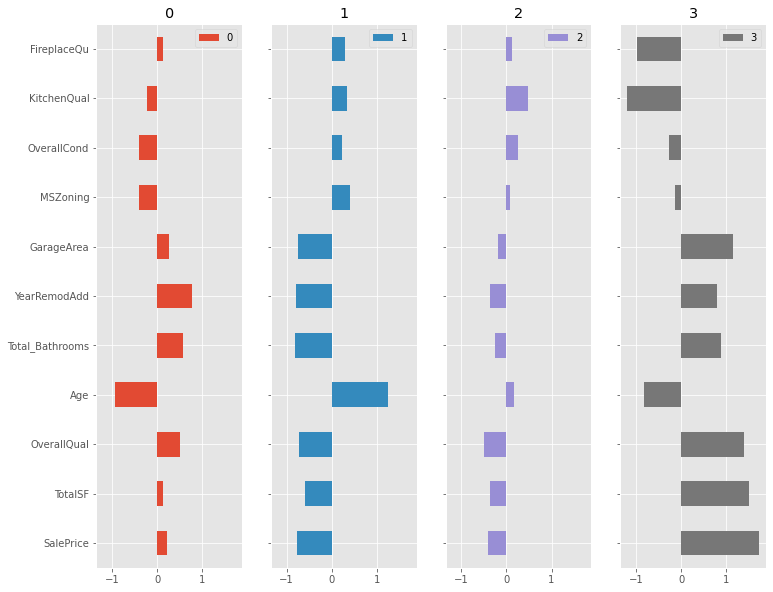

In [309]:
cluster_mean[1:].plot(figsize=(12,10), kind="barh" , subplots=True, layout=(1, 4) , sharey=True)

#### 주성분 분석

In [310]:
from sklearn.decomposition import PCA

In [311]:
pca = PCA(n_components=2)
house_pca = pca.fit(train_scaled).transform(train_scaled)

In [312]:
house_pca

array([[ 2.64787423, -1.14274333],
       [ 0.59160484, -0.80163732],
       [ 3.27273499, -0.86695645],
       ...,
       [ 1.78389829,  3.57962252],
       [-3.03539318, -0.99023265],
       [-0.66050633, -1.19928913]])

In [313]:
house_pca_df = pd.DataFrame(house_pca)
house_pca_df.columns = ["pca1","pca2"]

In [314]:
train_scaled_df = pd.concat([train_scaled_df, house_pca_df], axis=1)

In [315]:
train_scaled_df

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,...,SalePrice,hasHighFacility,Age,TotalSF,Total_Bathrooms,hasPorch,SalePrice_log,km_cluster,pca1,pca2
0,0.069617,-0.045768,-0.206346,-0.288764,0.058926,0.744525,0.310054,-0.026316,0.601627,-0.222579,...,0.387825,-0.325762,-1.046470,0.038930,1.736093,0.4596,0.586795,0,2.647874,-1.142743
1,-0.877169,-0.045768,0.512944,-0.075476,0.058926,0.744525,0.310054,-0.026316,-0.634124,-0.222579,...,0.031995,-0.325762,-0.188288,-0.017716,0.640132,0.4596,0.233882,2,0.591605,-0.801637
2,0.069617,-0.045768,-0.062488,0.230544,0.058926,-1.387256,0.310054,-0.026316,0.601627,-0.222579,...,0.585509,-0.325762,-0.980456,0.227753,1.736093,0.4596,0.763584,0,3.272735,-0.866956
3,0.306313,-0.045768,-0.446109,-0.084750,0.058926,-1.387256,0.310054,-0.026316,-1.869875,-0.222579,...,-0.514930,-0.325762,1.792130,-0.086502,-0.455829,0.4596,-0.426767,1,-1.522228,2.171157
4,0.069617,-0.045768,0.704755,0.788800,0.058926,-1.387256,0.310054,-0.026316,-0.634124,-0.222579,...,0.934750,-0.325762,-0.947449,1.086897,1.736093,0.4596,1.048721,3,5.718597,0.948546
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1440,0.069617,-0.045768,-0.350204,-0.387617,0.058926,0.744525,0.310054,-0.026316,0.601627,-0.222579,...,-0.053668,-0.325762,-0.947449,0.084787,0.640132,0.4596,0.141076,0,1.340956,-0.241171
1441,-0.877169,-0.045768,0.752707,0.587568,0.058926,0.744525,0.310054,-0.026316,0.601627,-0.222579,...,0.407594,-0.325762,-0.155281,1.453753,0.640132,0.4596,0.605037,2,1.782666,0.841906
1442,0.306313,-0.045768,-0.158393,-0.178967,0.058926,0.744525,0.310054,-0.026316,0.601627,-0.222579,...,1.152202,2.854821,1.065977,1.287858,-0.455829,0.4596,1.211364,0,1.783898,3.579623
1443,-0.877169,-0.045768,-0.062488,-0.053777,0.058926,0.744525,0.310054,-0.026316,0.601627,-0.222579,...,-0.486925,-0.325762,0.768914,-0.514051,-0.455829,0.4596,-0.388431,2,-3.035393,-0.990233


In [316]:
my_colors = plt.rcParams['axes.prop_cycle'].by_key()['color']

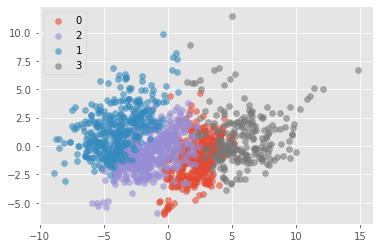

In [317]:
for cl in train_scaled_df['km_cluster'].unique():
    plt.scatter(train_scaled_df.loc[train_scaled_df["km_cluster"] == cl ,'pca1'], train_scaled_df.loc[train_scaled_df["km_cluster"] == cl ,'pca2'], label=cl, c=my_colors[cl], alpha=0.6)
plt.legend()
plt.show()

In [318]:
pca_comp_df = pd.DataFrame(pca.components_,columns=train_scaled_df.drop(["km_cluster","pca1","pca2"],axis=1).columns).T
pca_comp_df.columns = ["pca1","pca2"]

In [319]:
pca_comp_df

,pca1,pca2
MSSubClass,-0.007451,-0.045197
MSZoning,-0.067692,0.062006
LotFrontage,0.089335,0.138855
LotArea,0.084628,0.168670
Street,0.010013,0.010760
...,...,...
Age,-0.197903,0.246229
TotalSF,0.218012,0.188240
Total_Bathrooms,0.189083,0.029206
hasPorch,0.091475,0.031042


## Appendix2. High-end residential

### 고급 주택의 조건을 분석하고 시각화하기

#### SalePrice 분포 확인하기

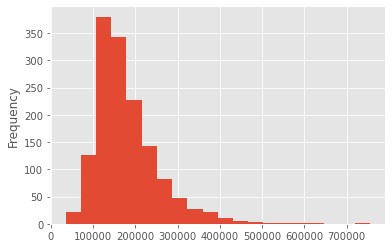

In [320]:
train_df_le['SalePrice'].plot.hist(bins=20)

In [321]:
train_df_le['SalePrice'].describe()

count      1445.000000
mean     179072.294118
std       75905.045476
min       34900.000000
25%      129900.000000
50%      162000.000000
75%      213000.000000
max      755000.000000
Name: SalePrice, dtype: float64

In [322]:
train_df['SalePrice'].quantile(0.9)

278000.0

#### 고급 주택 변수 추가하기

In [323]:
train_df_le.loc[train_df["SalePrice"] >= 278000, "high_class"] = 1

In [324]:
train_df_le["high_class"] = train_df_le["high_class"].fillna(0)

In [325]:
train_df_le.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,...,SaleType,SaleCondition,SalePrice,hasHighFacility,Age,TotalSF,Total_Bathrooms,hasPorch,SalePrice_log,high_class
0,1,60,3,65.0,8450,1,3,3,0,4,...,8,4,208500.0,0,5,2566.0,4.0,1,12.247694,0.0
1,2,20,3,80.0,9600,1,3,3,0,2,...,8,4,181500.0,0,31,2524.0,3.0,1,12.109011,0.0
2,3,60,3,68.0,11250,1,0,3,0,4,...,8,4,223500.0,0,7,2706.0,4.0,1,12.317167,0.0
3,4,70,3,60.0,9550,1,0,3,0,0,...,8,0,140000.0,0,91,2473.0,2.0,1,11.849398,0.0
4,5,60,3,84.0,14260,1,0,3,0,2,...,8,4,250000.0,0,8,3343.0,4.0,1,12.429216,0.0


#### 결정 트리를 시각화하기

In [326]:
from sklearn import tree
import pydotplus
from six import StringIO

In [327]:
tree_x = train_df_le[["TotalSF","OverallQual","Age","GrLivArea","GarageCars","Total_Bathrooms","GarageType",
"YearRemodAdd","GarageArea","CentralAir","MSZoning","OverallCond","KitchenQual","FireplaceQu","1stFlrSF"]]
tree_y = train_df_le[["high_class"]]

In [328]:
clf = tree.DecisionTreeClassifier(max_depth=4)
clf = clf.fit(tree_x, tree_y)

In [329]:
dot_data = StringIO()
tree.export_graphviz(clf, out_file=dot_data,feature_names=tree_x.columns)
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())

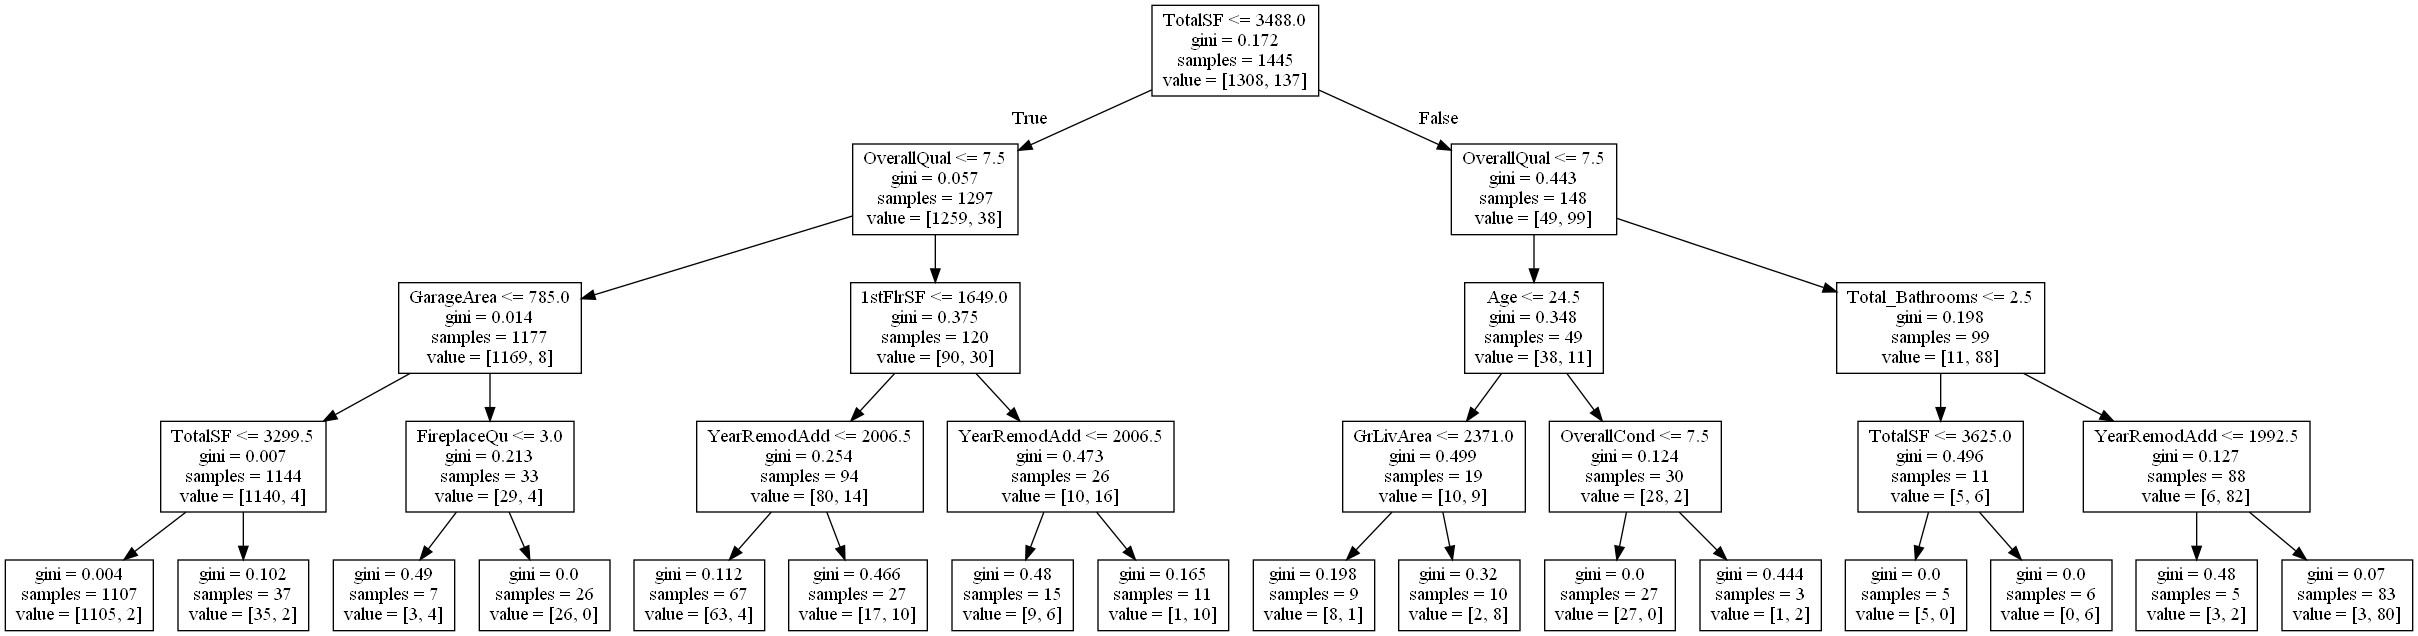

In [330]:
from IPython.display import Image
Image(graph.create_png())